<a href="https://colab.research.google.com/github/ozangocmen/RFantibody_test/blob/main/Score_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Jan 28 11:12:18 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!curl -LsSf https://astral.sh/uv/install.sh | sh

downloading uv 0.9.27 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!


In [ ]:
!source ~/.bashrc  # or ~/.zshrc if using zsh

In [ ]:
!git clone https://github.com/RosettaCommons/RFantibody.git


Cloning into 'RFantibody'...
remote: Enumerating objects: 957, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 957 (delta 164), reused 146 (delta 132), pack-reused 696 (from 1)
Receiving objects: 100% (957/957), 8.99 MiB | 19.55 MiB/s, done.
Resolving deltas: 100% (454/454), done.


In [ ]:
import os

In [ ]:
os.chdir("/content/RFantibody")

In [ ]:
!bash include/download_weights.sh

--2026-01-28 08:42:24--  https://files.ipd.uw.edu/pub/RFantibody/RFdiffusion_Ab.pt
Resolving files.ipd.uw.edu (files.ipd.uw.edu)... 128.95.160.135, 128.95.160.134, 2607:4000:406::160:135, ...
Connecting to files.ipd.uw.edu (files.ipd.uw.edu)|128.95.160.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483452922 (461M) [application/octet-stream]
Saving to: ‘RFdiffusion_Ab.pt’

RFdiffusion_Ab.pt   100%[===================>] 461.06M  15.0MB/s    in 19s     

2026-01-28 08:42:43 (24.3 MB/s) - ‘RFdiffusion_Ab.pt’ saved [483452922/483452922]

--2026-01-28 08:42:43--  https://files.ipd.uw.edu/pub/RFantibody/ProteinMPNN_v48_noise_0.2.pt
Resolving files.ipd.uw.edu (files.ipd.uw.edu)... 128.95.160.135, 128.95.160.134, 2607:4000:406::160:135, ...
Connecting to files.ipd.uw.edu (files.ipd.uw.edu)|128.95.160.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6681301 (6.4M) [application/octet-stream]
Saving to: ‘ProteinMPNN_v48_noise_0.2.pt’

Pr

In [ ]:
!uv sync

Using CPython 3.10.12 interpreter at: /usr/bin/python3.10
Creating virtual environment at: .venv
Resolved 74 packages in 6.94s
Prepared 64 packages in 1m 07s
Installed 65 packages in 661ms
 + annotated-types==0.7.0
 + antlr4-python3-runtime==4.9.3
 + asttokens==3.0.1
 + biotite==1.2.0
 + biotraj==1.2.2
 + certifi==2026.1.4
 + charset-normalizer==3.4.4
 + click==8.3.1
 + colorama==0.4.6
 + cuda-python==11.8.0
 + cython==3.2.4
 + dgl==2.4.0+cu118 (from https://data.dgl.ai/wheels/torch-2.3/cu118/dgl-2.4.0%2Bcu118-cp310-cp310-manylinux1_x86_64.whl)
 + e3nn==0.5.9
 + executing==2.2.1
 + filelock==3.20.3
 + fsspec==2026.1.0
 + hydra-core==1.3.2
 + icecream==2.1.10
 + idna==3.11
 + jinja2==3.1.6
 + markupsafe==3.0.3
 + mpmath==1.3.0
 + msgpack==1.1.2
 + networkx==3.4.2
 + numpy==1.26.4
 + nvidia-cublas-cu11==11.11.3.6
 + nvidia-cuda-cupti-cu11==11.8.87
 + nvidia-cuda-nvrtc-cu11==11.8.89
 + nvidia-cuda-runtime-cu11==11.8.89
 + nvidia-cudnn-cu11==8.7.0.84
 + nvidia-cufft-cu11==10.9.0.58
 + nvid

In [ ]:
!source .venv/bin/activate


In [ ]:
!rfdiffusion --help

/bin/bash: line 1: rfdiffusion: command not found


In [ ]:
!uv run rfdiffusion --help

Usage: rfdiffusion [OPTIONS]

  Run RFdiffusion antibody design.

  Generates antibody structures targeting a
  specific antigen using diffusion-based design.
  The designed loops can be specified with length
  ranges.

  Examples:
      # Basic antibody design
      rfdiffusion -t antigen.pdb -f framework.pdb -o my_designs/ab

      # Design with specific loop lengths and hotspots
      rfdiffusion -t antigen.pdb -f framework.pdb -l "H1:7,H3:5-13" -h "A305" -n 5

      # Output to Quiver file
      rfdiffusion -t antigen.pdb -f framework.pdb -q designs.qv -n 100

Options:
  -t, --target PATH          Target PDB file
                             (antigen)  [required]
  -f, --framework PATH       Framework PDB file
                             (antibody scaffold)
                             [required]
  -o, --output PATH          Output prefix for
                             designs (default:
                             designs/ab_des)
  -q, --output-quiver PATH   Output to Quiver fi

# Configuration

In [ ]:
# Input files
TARGET_PDB="/content/9cmiA.pdb"       # Target antigen
FRAMEWORK_PDB="/content/RFantibody/scripts/examples/example_inputs/hu-4D5-8_Fv.pdb" # antibody framework

# Output directory
OUTPUT_DIR="/content/output"

# RFdiffusion parameters
NUM_DESIGNS=5                        # Number of backbone designs
DESIGN_LOOPS="H1:7,H2:6,H3:5-13,L1:8-13,L2:7,L3:9-11"        # CDR loop lengths
HOTSPOTS="A45,A46,A146,A147,A47,A149,A150,A151,A152,A153,A158"               # Target residues to focus binding

# ProteinMPNN parameters
NUM_SEQS=4                              # Sequences per backbone
SAMPLING_TEMP=0.2                       # Sampling temperature

# RF2 parameters
NUM_RECYCLES=10                         # Recycling iterations

### RFDiffusion

In [ ]:
!uv run rfdiffusion \
    --target "$TARGET_PDB" \
    --framework "$FRAMEWORK_PDB" \
    --output-quiver "$OUTPUT_DIR/1_rfdiffusion.qv" \
    --num-designs "$NUM_DESIGNS" \
    --design-loops "$DESIGN_LOOPS" \
    --hotspots "$HOTSPOTS"

Running RFdiffusion with 5 designs...
Target: /content/9cmiA.pdb
Framework: /content/RFantibody/scripts/examples/example_inputs/hu-4D5-8_Fv.pdb
Design loops: H1:7,H2:6,H3:5-13,L1:8-13,L2:7,L3:9-11
/content/RFantibody/src/rfantibody/rfdiffusion/util.py:224: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at ../aten/src/ATen/native/Cross.cpp:62.)
  Z = torch.cross(Xn,Yn)
DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
/content/RFantibody/.venv/lib/python3.10/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'antibody': Defaults list is missing `

### ProteinMPNN

In [ ]:
!uv run proteinmpnn \
    --input-quiver "$OUTPUT_DIR/1_rfdiffusion.qv" \
    --output-quiver "$OUTPUT_DIR/2_proteinmpnn.qv" \
    --seqs-per-struct "$NUM_SEQS" \
    --temperature "$SAMPLING_TEMP"

Running ProteinMPNN sequence design...
Input: /content/output/1_rfdiffusion.qv
Loops: H1,H2,H3,L1,L2,L3
Sequences per structure: 4
Found GPU will run ProteinMPNN on GPU
Attempting pose: samples_design_0
loopH: [26, 27, 28, 29, 30, 31, 32, 52, 53, 54, 55, 56, 57, 99, 100, 101, 102, 103, 104, 105, 106]
loopL: [141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 169, 170, 171, 172, 173, 174, 175, 208, 209, 210, 211, 212, 213, 214, 215, 216]
MPNN generated 4 sequences in 6 seconds
sequence_optimize: [('EVQLVESGGGLVQPGGSLRLSCAASGFSIADYYIHWVRQAPGKGLEWVARIHPATGATRYADSVKGRFTISADTSKNTAYLQMNSLRAEDTAVYYCSRESGGNLFAWGQGTLVTVSSDIQMTQSPSSLSASVGDRVTITCTASQLVPDGRTFSWYQQKPGKAPKLLIYNNTTRASGVPSRFSGSRSGTDFTLTISSLQPEDFATYYCRDSSTNPVRFGQGTKVEIK', 1.236587), ('EVQLVESGGGLVQPGGSLRLSCAASGFSIADFYIHWVRQAPGKGLEWVARIHPATGATRYADSVKGRFTISADTSKNTAYLQMNSLRAEDTAVYYCSREEGGSMLHWGQGTLVTVSSDIQMTQSPSSLSASVGDRVTITCKASQLVPDGRQMDWYQQKPGKAPKLLIYNNTTRAPGVPSRFSGSRSGTDFTLTISSLQPEDFATYYCRDSSTDPVSFGQGTKVEIK', 1.3187808), 

###RF2

In [ ]:
!uv run rf2 \
    --input-quiver "$OUTPUT_DIR/2_proteinmpnn.qv" \
    --output-quiver "$OUTPUT_DIR/3_rf2.qv" \
    --num-recycles "$NUM_RECYCLES"

Running RF2 structure prediction...
Input: /content/output/2_proteinmpnn.qv
Recycles: 10
Hotspot show proportion: 0.1
Running RF2 with the following configs: {'input': {'pdb': None, 'pdb_dir': None, 'quiver': '/content/output/2_proteinmpnn.qv'}, 'output': {'pdb_dir': None, 'quiver': '/content/output/3_rf2.qv', 'output_intermediates': False}, 'inference': {'num_recycles': 10, 'hotspot_show_proportion': 0.1, 'cautious': True}, 'model': {'model_weights': '/content/RFantibody/weights/RF2_ab.pt'}, 'model_param': {'n_extra_block': 4, 'n_main_block': 36, 'd_msa': 256, 'd_pair': 128, 'd_templ': 64, 'n_head_msa': 8, 'n_head_pair': 4, 'n_head_templ': 4, 'd_hidden': 32, 'd_hidden_templ': 32, 'd_t1d': 23, 'p_drop': 0.0, 'SE3_param_full': {'num_layers': 1, 'num_channels': 48, 'num_degrees': 2, 'l0_in_features': 32, 'l0_out_features': 32, 'l1_in_features': 2, 'l1_out_features': 2, 'num_edge_features': 32, 'div': 4, 'n_heads': 4}, 'SE3_param_topk': {'num_layers': 1, 'num_channels': 128, 'num_degrees'

### Scoring

In [ ]:
!git clone https://github.com/nrbennet/quiver.git

Cloning into 'quiver'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 128 (delta 6), reused 128 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 5.02 MiB | 18.56 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
# List all designs
!/content/RFantibody/quiver/qvscorefile /content/output/3_rf2.qv



In [ ]:
# Extract information on how well RFdiffusion targeted the hotspots for each design
!qvscorefile $OUTPUT_DIR/1_rfdiffusion.qv

# Extract RF2 scores to a tab-separated scorefile (3_rf2.sc)
!qvscorefile $OUTPUT_DIR/3_rf2.qv

# Extract all PDBs for visual inspection
!qvextract $OUTPUT_DIR/3_rf2.qv -o /content/output/

In [ ]:
!/content/RFantibody/quiver/qvextract /content/output/3_rf2.qv

Successfully extracted 20 PDB files from /content/output/3_rf2.qv


# sorting

In [4]:
import pandas as pd

# Dosya adı
input_file = '/content/3_rf2.sc'
output_file = '/content/filtered_sorted_by_metrics.csv'

# Dosyayı yükle (regex uyarısını düzeltmek için r'\s+' kullanıldı)
df = pd.read_csv(input_file, sep=r'\s+')

# 1. Filtreleri Uygula
# pae < 10 VE framework_aligned_cdr_rmsd < 2.0
filtered_df = df[
    (df['pae'] < 10) &
    (df['framework_aligned_cdr_rmsd'] < 2.0)
].copy()

# 2. Değerlere Göre Sırala (Sort by Values)
# Öncelik PAE, sonra RMSD. Her ikisi de 'ascending=True' (küçükten büyüğe).
sorted_df = filtered_df.sort_values(
    by=['pae', 'framework_aligned_cdr_rmsd'],
    ascending=[True, True]
)

# Sonuçları Göster
print(f"Geçen Tasarım Sayısı: {len(sorted_df)}")
print("-" * 50)
print(sorted_df[['tag', 'pae', 'framework_aligned_cdr_rmsd']])

# CSV olarak kaydet
sorted_df.to_csv(output_file, index=False)

Geçen Tasarım Sayısı: 260
--------------------------------------------------
                                   tag   pae  framework_aligned_cdr_rmsd
776  samples_design_77_dldesign_6_best  3.23                        1.58
832  samples_design_83_dldesign_2_best  3.48                        1.55
771  samples_design_77_dldesign_1_best  3.60                        1.58
965  samples_design_96_dldesign_5_best  3.74                        1.21
7     samples_design_0_dldesign_7_best  3.85                        0.89
..                                 ...   ...                         ...
719  samples_design_71_dldesign_9_best  9.98                        1.15
713  samples_design_71_dldesign_3_best  9.98                        1.31
875  samples_design_87_dldesign_5_best  9.99                        0.77
67    samples_design_6_dldesign_7_best  9.99                        0.87
540  samples_design_54_dldesign_0_best  9.99                        1.80

[260 rows x 3 columns]


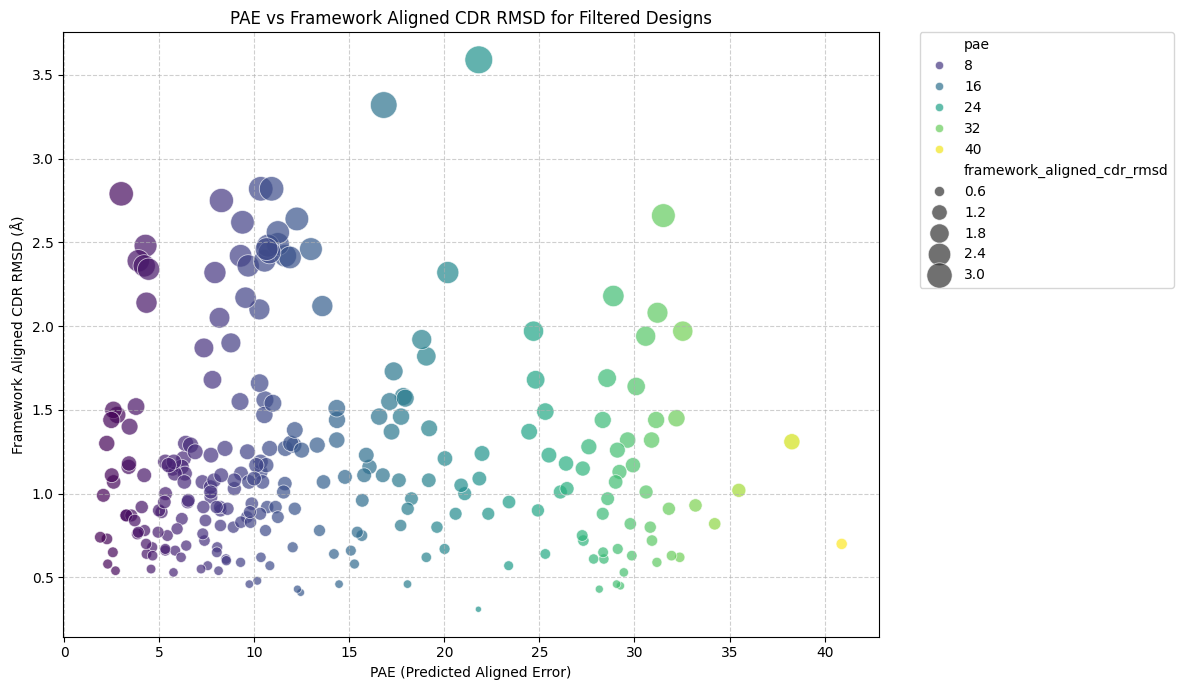

Top 5 designs by PAE and RMSD:
           interaction_pae    pae  pred_lddt  target_aligned_antibody_rmsd  \
4.35 3.23              0.9   2.25       2.21                          1.10   
4.85 3.48              0.9   3.78       2.42                          1.15   
5.02 3.60              0.9   3.26       3.28                          1.14   
5.45 3.74              0.9  29.92      22.67                          0.76   
5.80 3.85              0.9   6.19       3.97                          0.78   

           target_aligned_cdr_rmsd  framework_aligned_antibody_rmsd  \
4.35 3.23                     1.58                             1.63   
4.85 3.48                     1.55                             2.11   
5.02 3.60                     1.58                             1.54   
5.45 3.74                     1.21                             1.43   
5.80 3.85                     0.89                             1.41   

           framework_aligned_cdr_rmsd  framework_aligned_H1_rmsd  \
4.35 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolu
input_file = '/content/filtered_sorted_by_metrics.csv'

# CSV dosyasını oku
df = pd.read_csv(input_file)

# Görselleştirme
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate legend
sns.scatterplot(data=df, x='pae', y='framework_aligned_cdr_rmsd', hue='pae', size='framework_aligned_cdr_rmsd', sizes=(20, 400), palette='viridis', alpha=0.7)
plt.title('PAE vs Framework Aligned CDR RMSD for Filtered Designs')
plt.xlabel('PAE (Predicted Aligned Error)')
plt.ylabel('Framework Aligned CDR RMSD (Å)')
plt.grid(True, linestyle='--', alpha=0.6)

# Designs to highlight without annotations
designs_to_highlight_tags = [
    'samples_design_77_dldesign_6_best',
    'samples_design_83_dldesign_2_best',
    'samples_design_77_dldesign_1_best',
    'samples_design_96_dldesign_5_best',
    'samples_design_0_dldesign_7_best'
]

# Add visual markers for specific designs without text labels
for tag_value in designs_to_highlight_tags:
    highlight_df = df[df['tag'] == tag_value]
    if not highlight_df.empty:
        plt.scatter(highlight_df['pae'], highlight_df['framework_aligned_cdr_rmsd'],
                    color='red', marker='.', s=100, edgecolor='black', linewidth=1.5, zorder=5) # Changed marker to 'o' and reduced size

# Move the legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout() # Adjust layout to prevent legend from being cut off
plt.show()

print("Top 5 designs by PAE and RMSD:")
print(df.head())

Toplam tasarım sayısı: 1000
Filtreleme sonrası kalan tasarım sayısı: 39


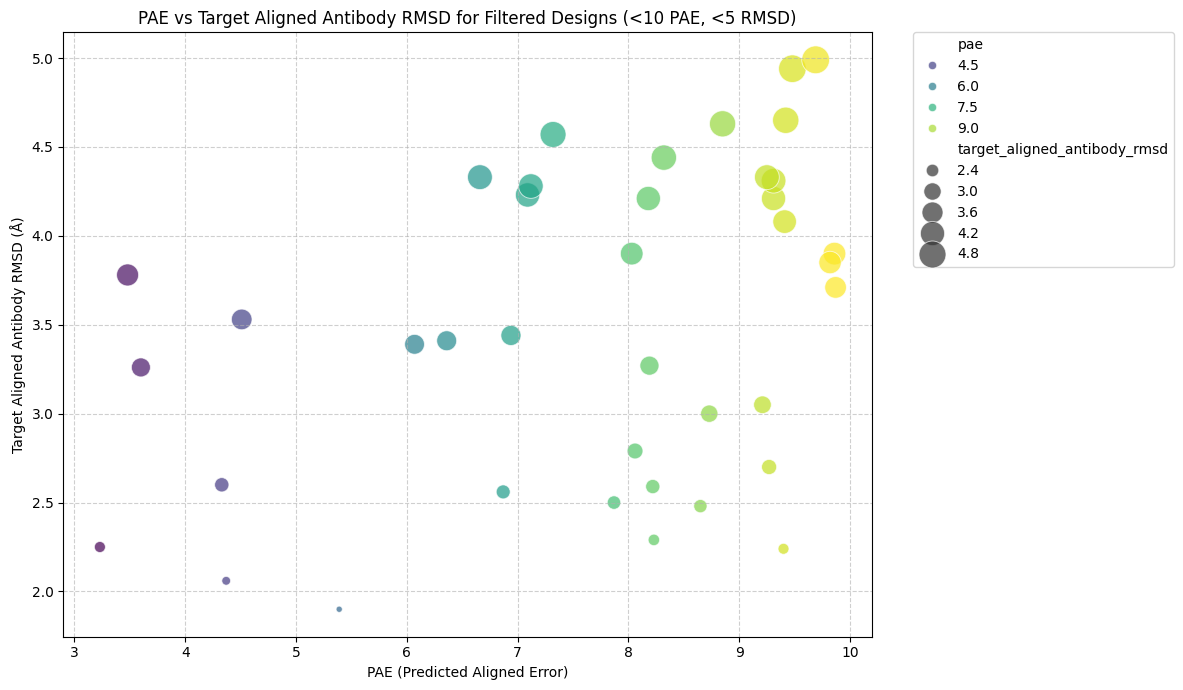

Filtered designs head:
     interaction_pae   pae  pred_lddt  target_aligned_antibody_rmsd  \
2              17.77  9.86       0.90                          3.90   
4              12.21  7.09       0.90                          4.23   
8              16.94  9.48       0.90                          4.94   
79             16.78  9.41       0.89                          4.08   
237            16.70  9.31       0.90                          4.21   

     target_aligned_cdr_rmsd  framework_aligned_antibody_rmsd  \
2                       3.23                             0.90   
4                       2.68                             0.92   
8                       3.73                             0.89   
79                      3.06                             0.92   
237                     3.44                             0.63   

     framework_aligned_cdr_rmsd  framework_aligned_H1_rmsd  \
2                          1.31                       1.31   
4                          1.39    

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dosya yolu
input_file = '/content/3_rf2.sc' # Changed to the original score file

# CSV dosyasını oku (space-separated olduğu için 'sep=r'\s+' kullanıyoruz)
df = pd.read_csv(input_file, sep=r'\s+')

print(f"Toplam tasarım sayısı: {len(df)}")

# Apply the filters
filtered_df = df[
    (df['pae'] < 10) &
    (df['target_aligned_antibody_rmsd'] < 5)
].copy()

print(f"Filtreleme sonrası kalan tasarım sayısı: {len(filtered_df)}")

# Use the filtered DataFrame for plotting
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate legend
sns.scatterplot(data=filtered_df, x='pae', y='target_aligned_antibody_rmsd', hue='pae', size='target_aligned_antibody_rmsd', sizes=(20, 400), palette='viridis', alpha=0.7)
plt.title('PAE vs Target Aligned Antibody RMSD for Filtered Designs (<10 PAE, <5 RMSD)') # Updated title to reflect filters
plt.xlabel('PAE (Predicted Aligned Error)')
plt.ylabel('Target Aligned Antibody RMSD (Å)')
plt.grid(True, linestyle='--', alpha=0.6)

# Moved legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout() # Adjust layout to prevent legend from being cut off
plt.show()

print("Filtered designs head:")
print(filtered_df.head())

In [14]:
import pandas as pd

# Dosya yolları
input_file = '/content/3_rf2.sc'
output_file = '/content/top_100_filtered_sorted.csv' # Çıktı ismini güncelledim

# Dosyayı yükle
df = pd.read_csv(input_file, sep=r'\s+')

# 1. Filtreleri Uygula
# pae < 10 VE target_aligned_antibody_rmsd < 8.0
filtered_df = df[
    (df['pae'] < 10) &
    (df['target_aligned_antibody_rmsd'] < 8.0)
].copy()

# 2. Değerlere Göre Sırala
# Öncelik PAE, sonra RMSD. (Küçükten büyüğe)
sorted_df = filtered_df.sort_values(
    by=['pae', 'target_aligned_antibody_rmsd'],
    ascending=[True, True]
)

# 3. İLK 100 TANESİNİ SEÇ
# Eğer filtre sonrası 100'den az veri kaldıysa hepsini, çoksa ilk 100'ü alır.
top_100_df = sorted_df.head(100)

# Sonuçları Göster
print(f"Filtreden Geçen Toplam Sayı: {len(sorted_df)}")
print(f"Seçilen (İlk 100) Sayısı: {len(top_100_df)}")
print("-" * 50)
print(top_100_df[['tag', 'pae', 'target_aligned_antibody_rmsd']])

# CSV olarak kaydet
top_100_df.to_csv(output_file, index=False)
print(f"Dosya kaydedildi: {output_file}")

Filtreden Geçen Toplam Sayı: 81
Seçilen (İlk 100) Sayısı: 81
--------------------------------------------------
                                   tag   pae  target_aligned_antibody_rmsd
776  samples_design_77_dldesign_6_best  3.23                          2.25
832  samples_design_83_dldesign_2_best  3.48                          3.78
771  samples_design_77_dldesign_1_best  3.60                          3.26
7     samples_design_0_dldesign_7_best  3.85                          6.19
924  samples_design_92_dldesign_4_best  4.31                          7.72
..                                 ...   ...                           ...
668  samples_design_66_dldesign_8_best  9.87                          3.71
524  samples_design_52_dldesign_4_best  9.88                          5.50
911  samples_design_91_dldesign_1_best  9.88                          7.20
447  samples_design_44_dldesign_7_best  9.92                          7.32
618  samples_design_61_dldesign_8_best  9.93                   

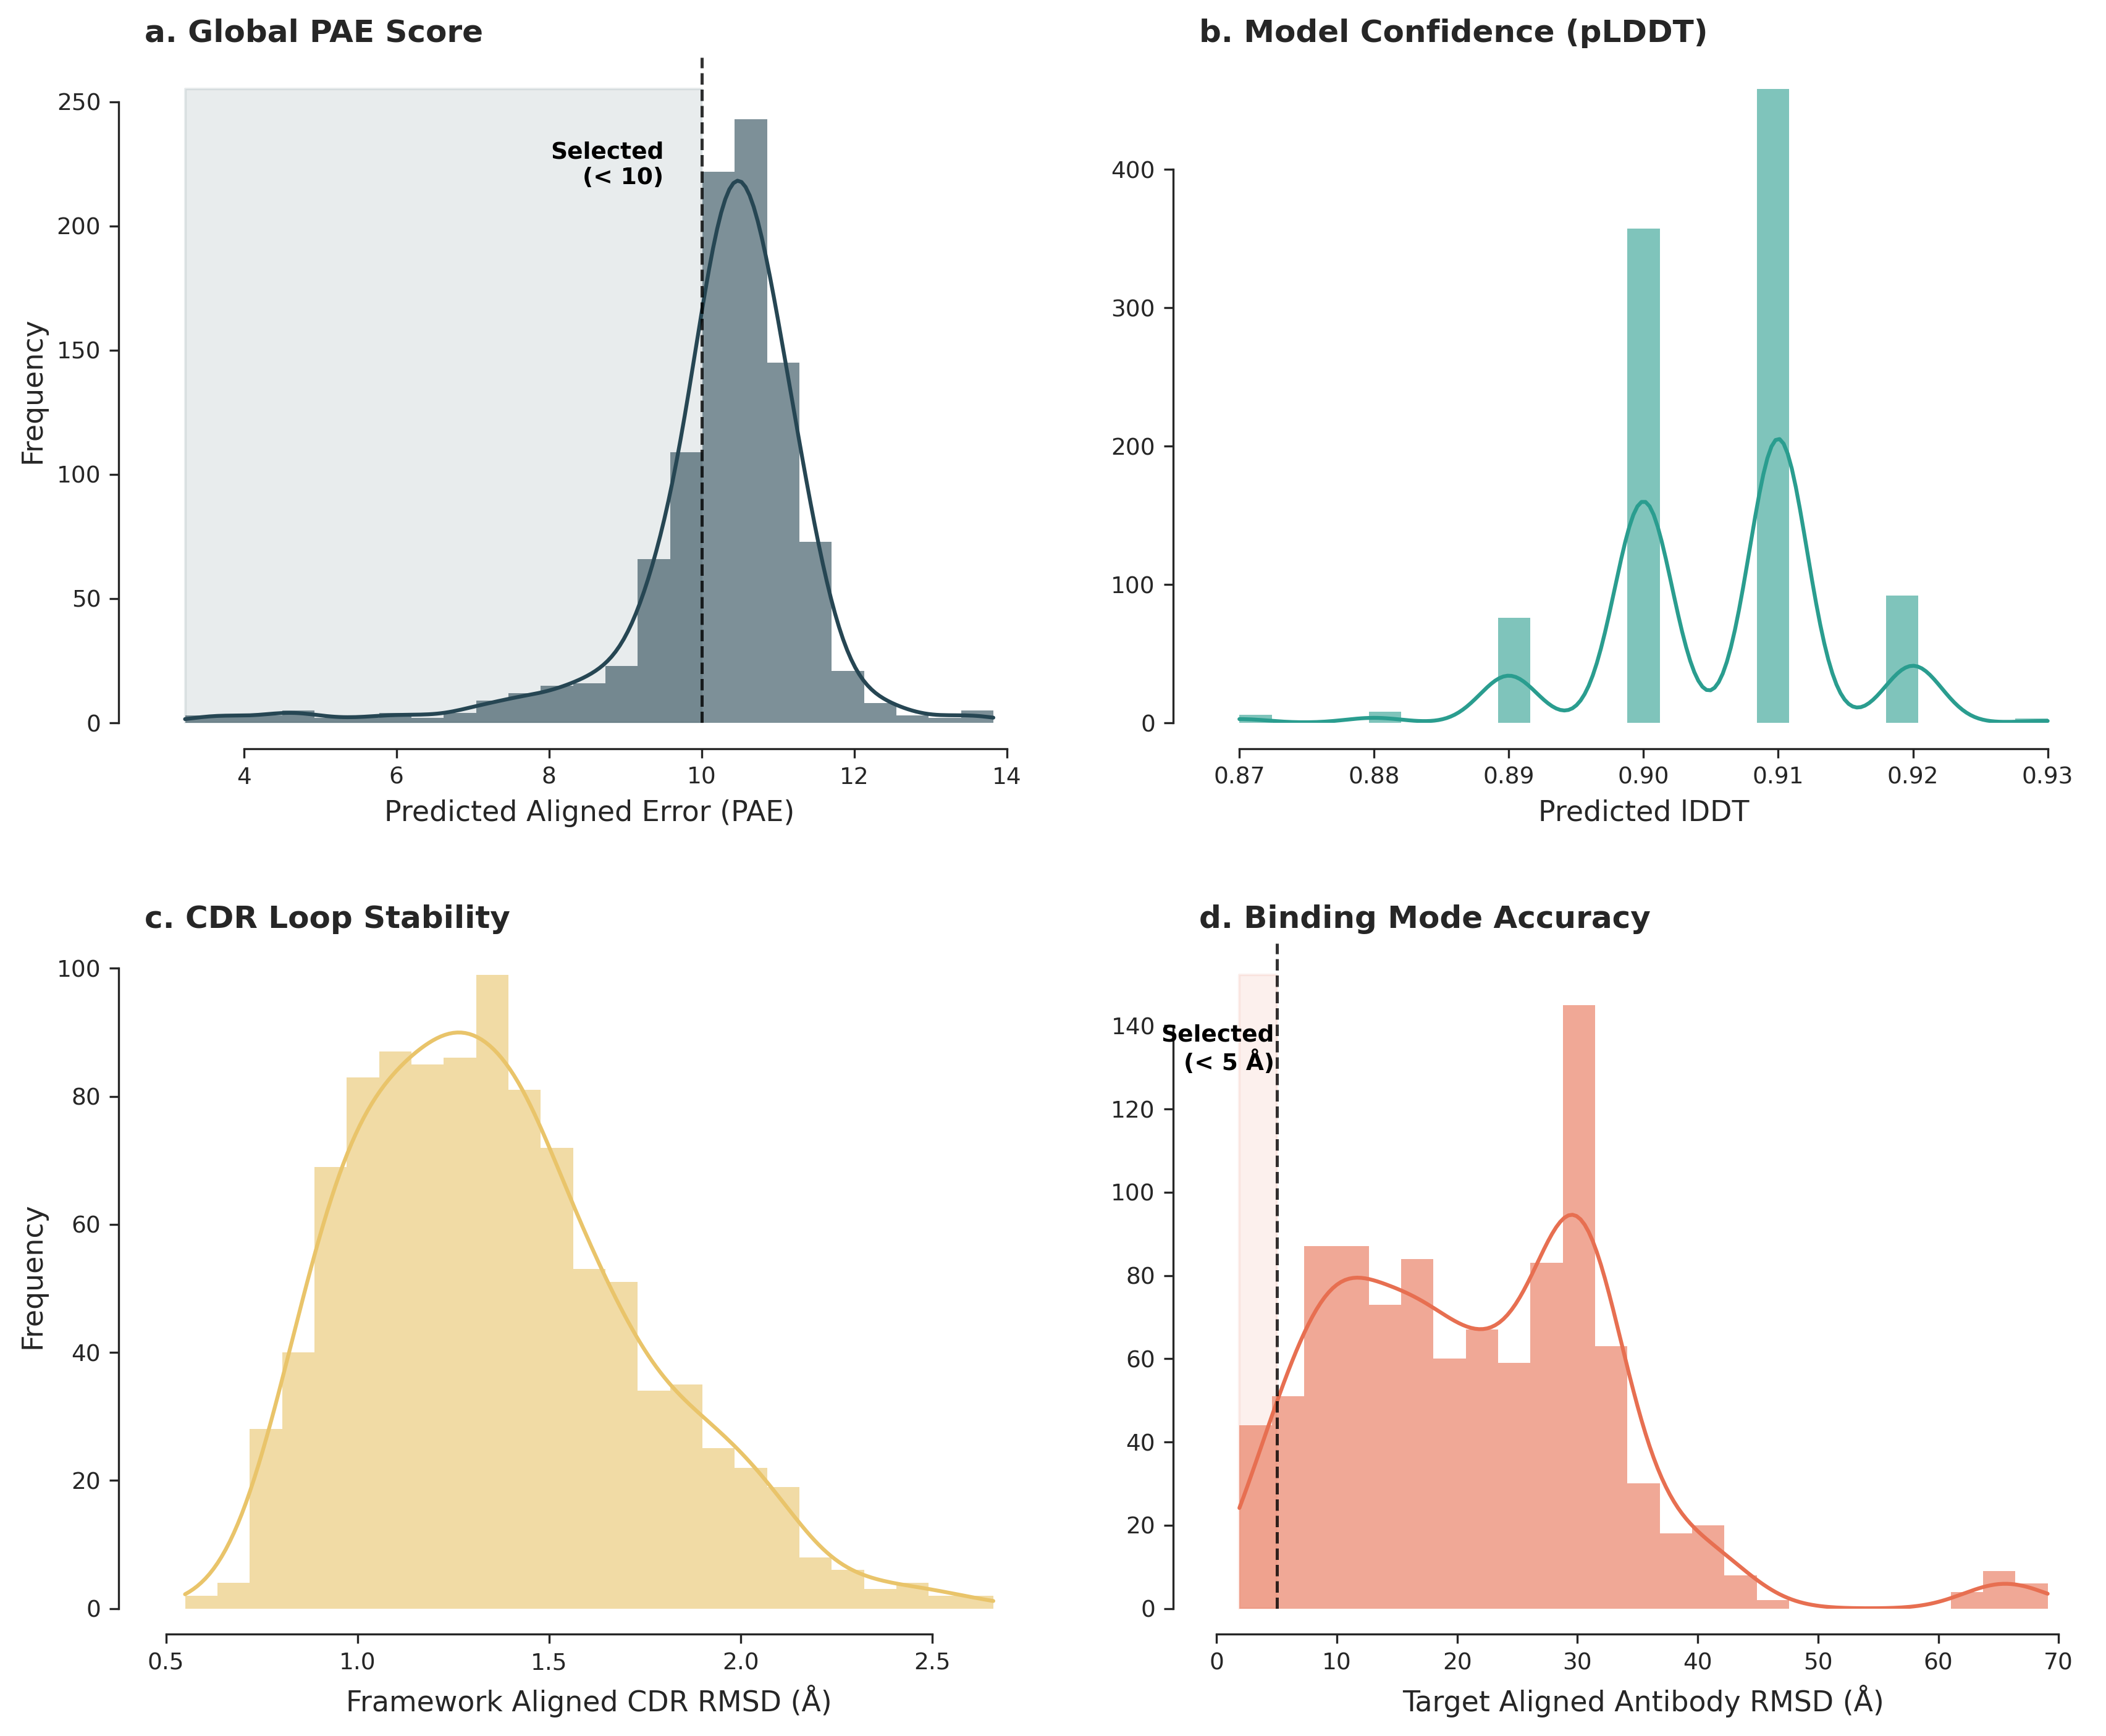

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# --- 1. STİL AYARLARI (Nature/Science Standardı) ---
# Arial veya Helvetica fontu akademik standarttır.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 14

# "Ticks" stili, gridleri kaldırıp eksen çizgilerini dışa verir (daha temiz görünüm)
sns.set_style("ticks")

# Veri Kontrolü
if 'df_all' not in locals():
    # Demo amaçlı yükleme (Sizde zaten yüklü ise burayı atlar)
    input_file = '/content/3_rf2.sc'
    try:
        df_all = pd.read_csv(input_file, sep=r'\s+')
    except:
        print("Veri yüklenemedi, lütfen df_all değişkenini kontrol edin.")
        df_all = pd.DataFrame()

if not df_all.empty:
    # Profesyonel, göz yormayan, renk körü dostu palet
    # (Teal, SteelBlue, Muted Purple, Muted Red)
    custom_colors = ["#264653", "#2A9D8F", "#E9C46A", "#E76F51"]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=300) # 300 DPI baskı kalitesidir

    # Başlık opsiyoneldir, paper'larda genelde Figure Caption'da yazar ama buraya ekleyelim
    # fig.suptitle('Structural Metrics Distribution', fontweight='bold', y=0.98)

    # --- PLOT 1: PAE (Cutoff < 10) ---
    ax1 = axes[0, 0]
    sns.histplot(df_all['pae'], bins=25, kde=True, ax=ax1,
                 color=custom_colors[0], alpha=0.6, element="step", linewidth=0)

    # Cutoff Çizgisi ve Alan Boyama
    cutoff_pae = 10
    ax1.axvline(x=cutoff_pae, color='black', linestyle='--', linewidth=1.2, alpha=0.8)

    # Seçilen alanı hafifçe boya (Elegant vurgu)
    # y ekseni limitlerini alıp boyama yapalım
    ymin, ymax = ax1.get_ylim()
    ax1.fill_betweenx([ymin, ymax], df_all['pae'].min(), cutoff_pae, color=custom_colors[0], alpha=0.1)

    # Metin (Annotation) - Lejant yerine doğrudan grafik üzerine
    ax1.text(cutoff_pae - 0.5, ymax*0.85, 'Selected\n(< 10)',
             horizontalalignment='right', color='black', fontsize=9, fontweight='bold')

    ax1.set_xlabel('Predicted Aligned Error (PAE)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('a. Global PAE Score', loc='left', fontweight='bold')

    # --- PLOT 2: Predicted lDDT ---
    ax2 = axes[0, 1]
    sns.histplot(df_all['pred_lddt'], bins=25, kde=True, ax=ax2,
                 color=custom_colors[1], alpha=0.6, element="step", linewidth=0)
    ax2.set_xlabel('Predicted lDDT')
    ax2.set_ylabel('') # Y ekseni tekrarına gerek yok, clean look
    ax2.set_title('b. Model Confidence (pLDDT)', loc='left', fontweight='bold')

    # --- PLOT 3: Framework Aligned CDR RMSD ---
    ax3 = axes[1, 0]
    sns.histplot(df_all['framework_aligned_cdr_rmsd'], bins=25, kde=True, ax=ax3,
                 color=custom_colors[2], alpha=0.6, element="step", linewidth=0)
    ax3.set_xlabel('Framework Aligned CDR RMSD (Å)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('c. CDR Loop Stability', loc='left', fontweight='bold')

    # --- PLOT 4: Target Aligned Antibody RMSD (Cutoff < 5) ---
    ax4 = axes[1, 1]
    sns.histplot(df_all['target_aligned_antibody_rmsd'], bins=25, kde=True, ax=ax4,
                 color=custom_colors[3], alpha=0.6, element="step", linewidth=0)

    # Cutoff Çizgisi ve Alan Boyama
    cutoff_rmsd = 5
    ax4.axvline(x=cutoff_rmsd, color='black', linestyle='--', linewidth=1.2, alpha=0.8)

    ymin, ymax = ax4.get_ylim()
    ax4.fill_betweenx([ymin, ymax], df_all['target_aligned_antibody_rmsd'].min(), cutoff_rmsd, color=custom_colors[3], alpha=0.1)

    ax4.text(cutoff_rmsd - 0.2, ymax*0.85, 'Selected\n(< 5 Å)',
             horizontalalignment='right', color='black', fontsize=9, fontweight='bold')

    ax4.set_xlabel('Target Aligned Antibody RMSD (Å)')
    ax4.set_ylabel('')
    ax4.set_title('d. Binding Mode Accuracy', loc='left', fontweight='bold')

    # --- GENEL TEMİZLİK (THE MAGIC TOUCH) ---
    # Despine: Üst ve sağ çerçeveleri kaldırır (Nature stili)
    sns.despine(trim=True, offset=10)

    plt.tight_layout(pad=3.0)
    plt.show()

else:
    print("Görselleştirilecek veri yok.")

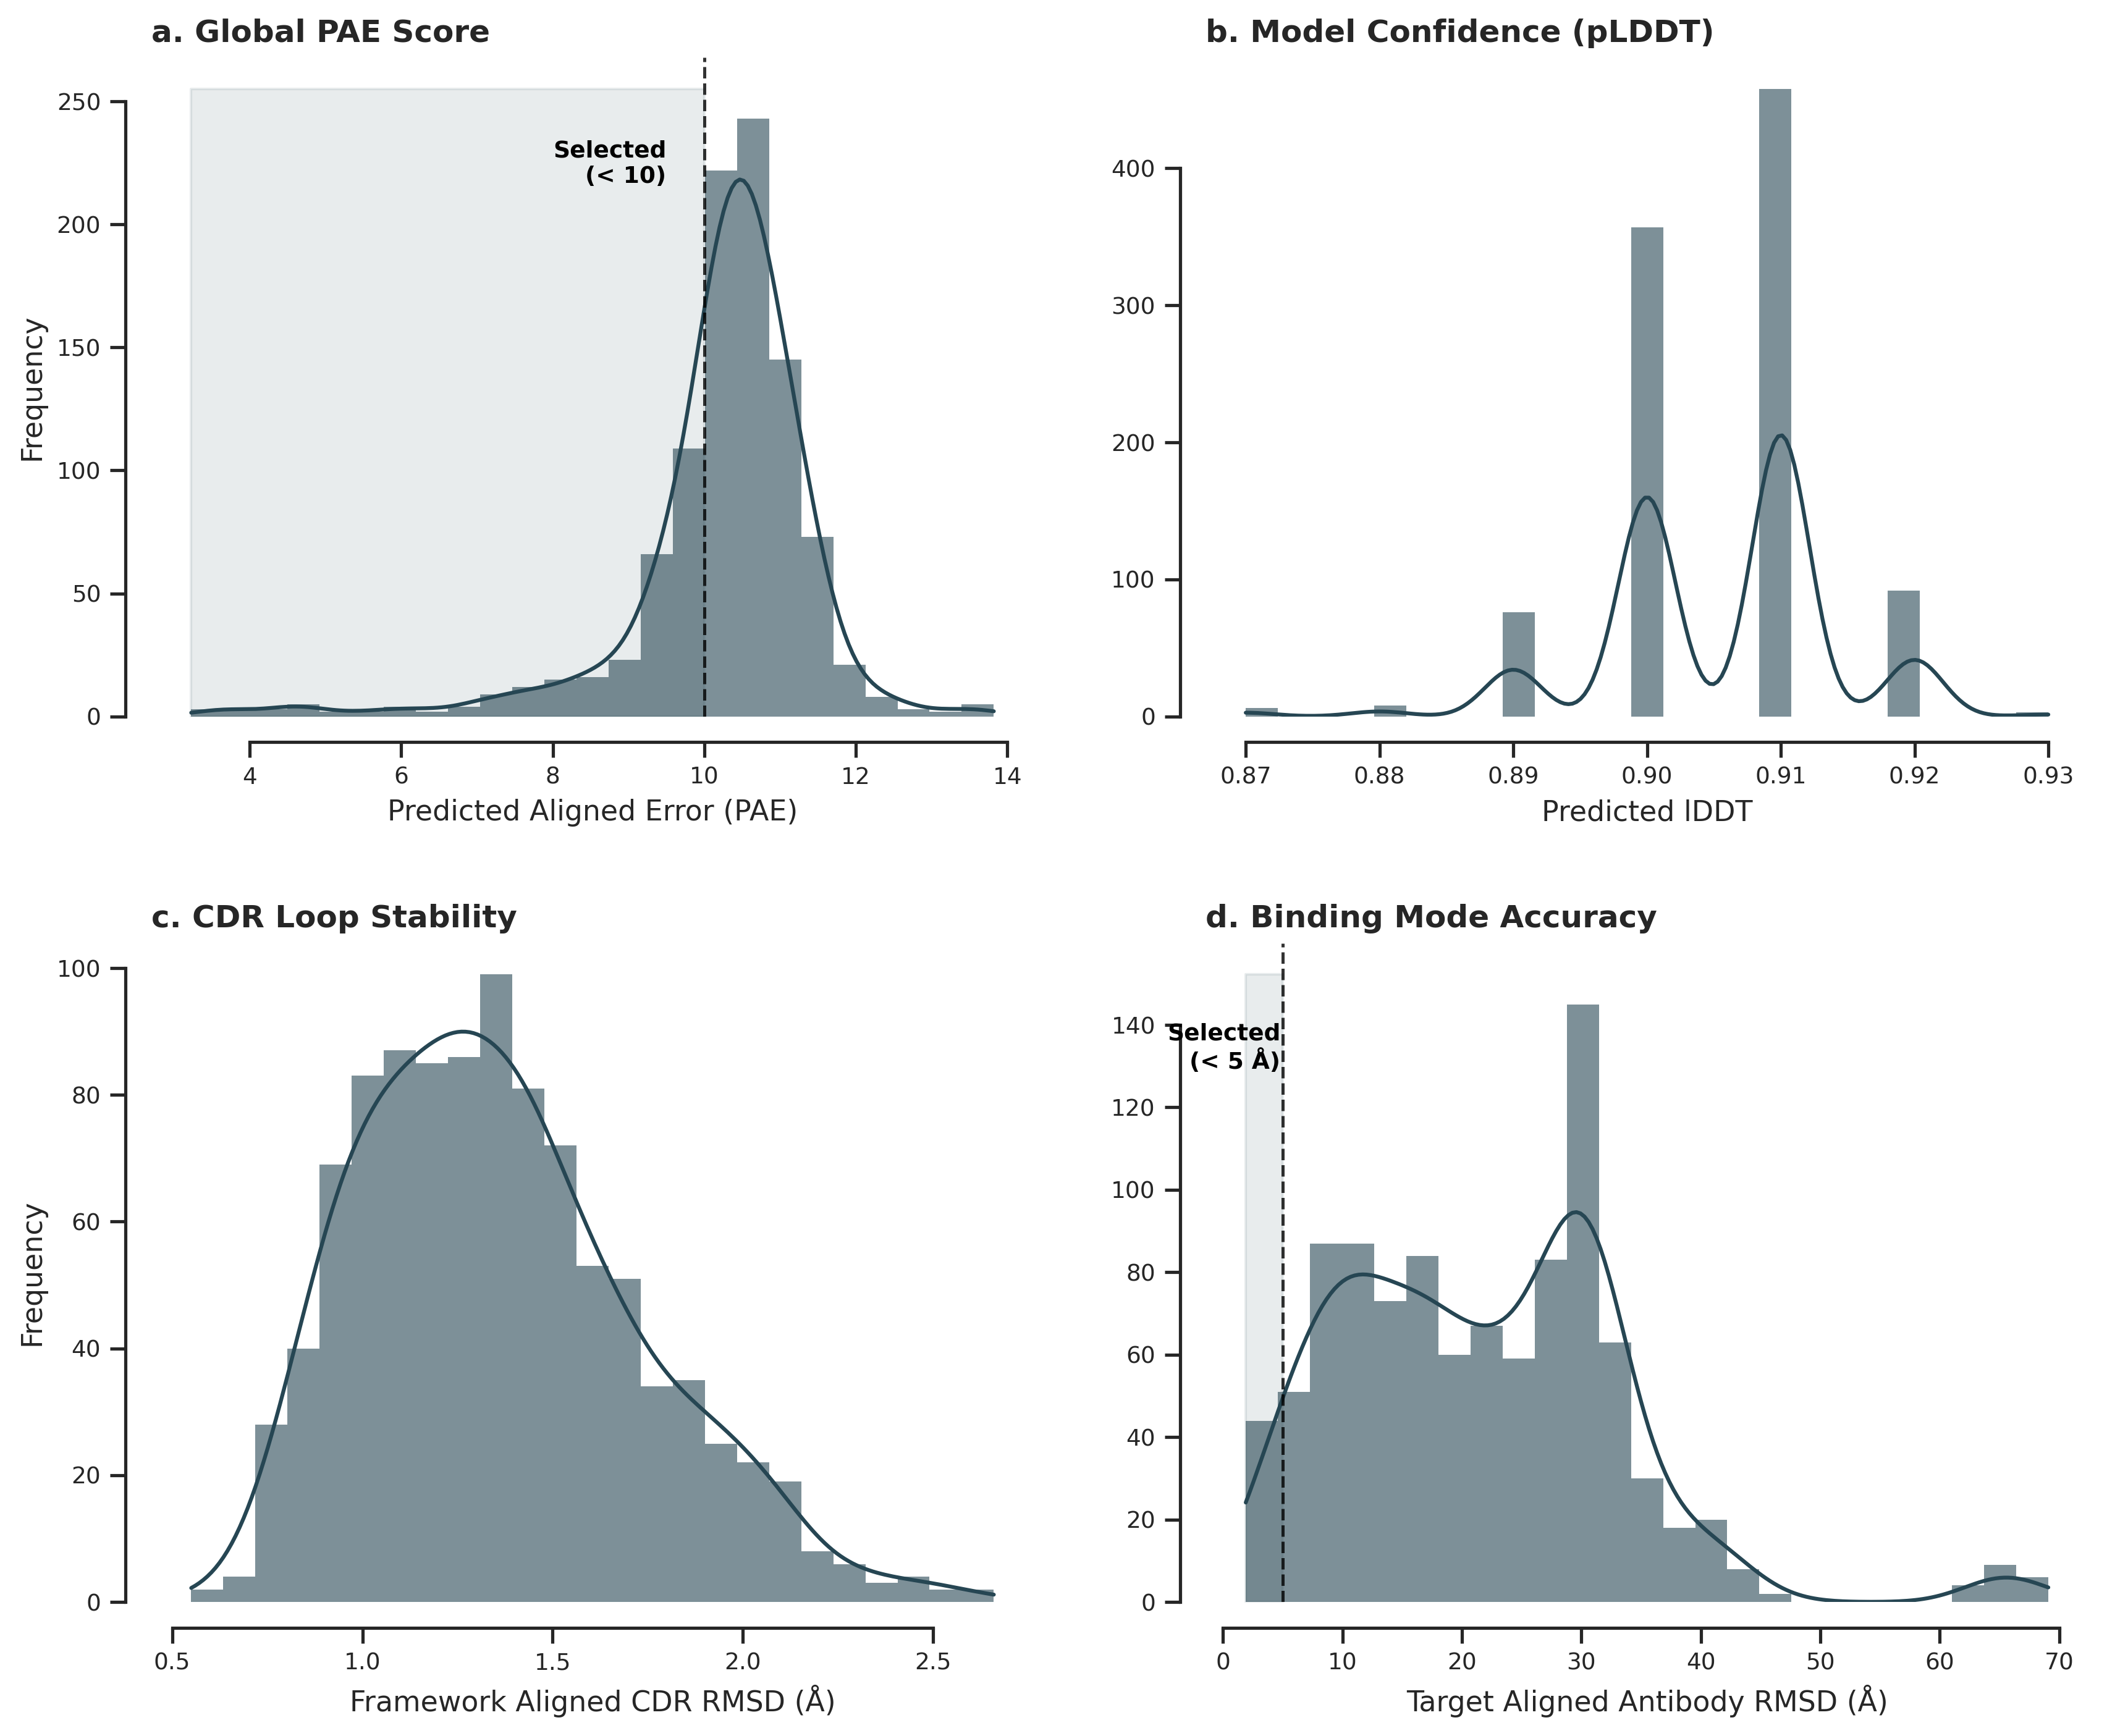

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. STİL AYARLARI (Nature/Science Standardı) ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['figure.titlesize'] = 14

# "Ticks" stili: Gridleri kaldır, eksen çizgilerini dışa ver
sns.set_style("ticks")

# Veri Kontrolü
if 'df_all' not in locals():
    input_file = '/content/3_rf2.sc'
    try:
        df_all = pd.read_csv(input_file, sep=r'\s+')
    except:
        print("Veri yüklenemedi, lütfen df_all değişkenini kontrol edin.")
        df_all = pd.DataFrame()

if not df_all.empty:
    # --- TEK RENK SEÇİMİ ---
    # Tüm grafiklerde kullanılacak ortak renk.
    # Alternatif öneriler: "#264653" (Koyu Yeşilimsi), "#3B528B" (Lacivert), "#5F5F5F" (Koyu Gri)
    UNIFORM_COLOR = "#264653"

    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=300)

    # --- PLOT 1: PAE (Cutoff < 10) ---
    ax1 = axes[0, 0]
    sns.histplot(df_all['pae'], bins=25, kde=True, ax=ax1,
                 color=UNIFORM_COLOR, alpha=0.6, element="step", linewidth=0)

    # Cutoff Çizgisi ve Alan Boyama
    cutoff_pae = 10
    ax1.axvline(x=cutoff_pae, color='black', linestyle='--', linewidth=1.2, alpha=0.8)

    # Seçilen alanı aynı rengin çok şeffaf haliyle boya
    ymin, ymax = ax1.get_ylim()
    ax1.fill_betweenx([ymin, ymax], df_all['pae'].min(), cutoff_pae, color=UNIFORM_COLOR, alpha=0.1)

    ax1.text(cutoff_pae - 0.5, ymax*0.85, 'Selected\n(< 10)',
             horizontalalignment='right', color='black', fontsize=9, fontweight='bold')

    ax1.set_xlabel('Predicted Aligned Error (PAE)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('a. Global PAE Score', loc='left', fontweight='bold')

    # --- PLOT 2: Predicted lDDT ---
    ax2 = axes[0, 1]
    sns.histplot(df_all['pred_lddt'], bins=25, kde=True, ax=ax2,
                 color=UNIFORM_COLOR, alpha=0.6, element="step", linewidth=0)
    ax2.set_xlabel('Predicted lDDT')
    ax2.set_ylabel('')
    ax2.set_title('b. Model Confidence (pLDDT)', loc='left', fontweight='bold')

    # --- PLOT 3: Framework Aligned CDR RMSD ---
    ax3 = axes[1, 0]
    sns.histplot(df_all['framework_aligned_cdr_rmsd'], bins=25, kde=True, ax=ax3,
                 color=UNIFORM_COLOR, alpha=0.6, element="step", linewidth=0)
    ax3.set_xlabel('Framework Aligned CDR RMSD (Å)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('c. CDR Loop Stability', loc='left', fontweight='bold')

    # --- PLOT 4: Target Aligned Antibody RMSD (Cutoff < 5) ---
    ax4 = axes[1, 1]
    sns.histplot(df_all['target_aligned_antibody_rmsd'], bins=25, kde=True, ax=ax4,
                 color=UNIFORM_COLOR, alpha=0.6, element="step", linewidth=0)

    # Cutoff
    cutoff_rmsd = 5
    ax4.axvline(x=cutoff_rmsd, color='black', linestyle='--', linewidth=1.2, alpha=0.8)

    ymin, ymax = ax4.get_ylim()
    ax4.fill_betweenx([ymin, ymax], df_all['target_aligned_antibody_rmsd'].min(), cutoff_rmsd, color=UNIFORM_COLOR, alpha=0.1)

    ax4.text(cutoff_rmsd - 0.2, ymax*0.85, 'Selected\n(< 5 Å)',
             horizontalalignment='right', color='black', fontsize=9, fontweight='bold')

    ax4.set_xlabel('Target Aligned Antibody RMSD (Å)')
    ax4.set_ylabel('')
    ax4.set_title('d. Binding Mode Accuracy', loc='left', fontweight='bold')

    # --- GENEL TEMİZLİK ---
    sns.despine(trim=True, offset=10)
    plt.tight_layout(pad=3.0)
    plt.show()

else:
    print("Görselleştirilecek veri yok.")

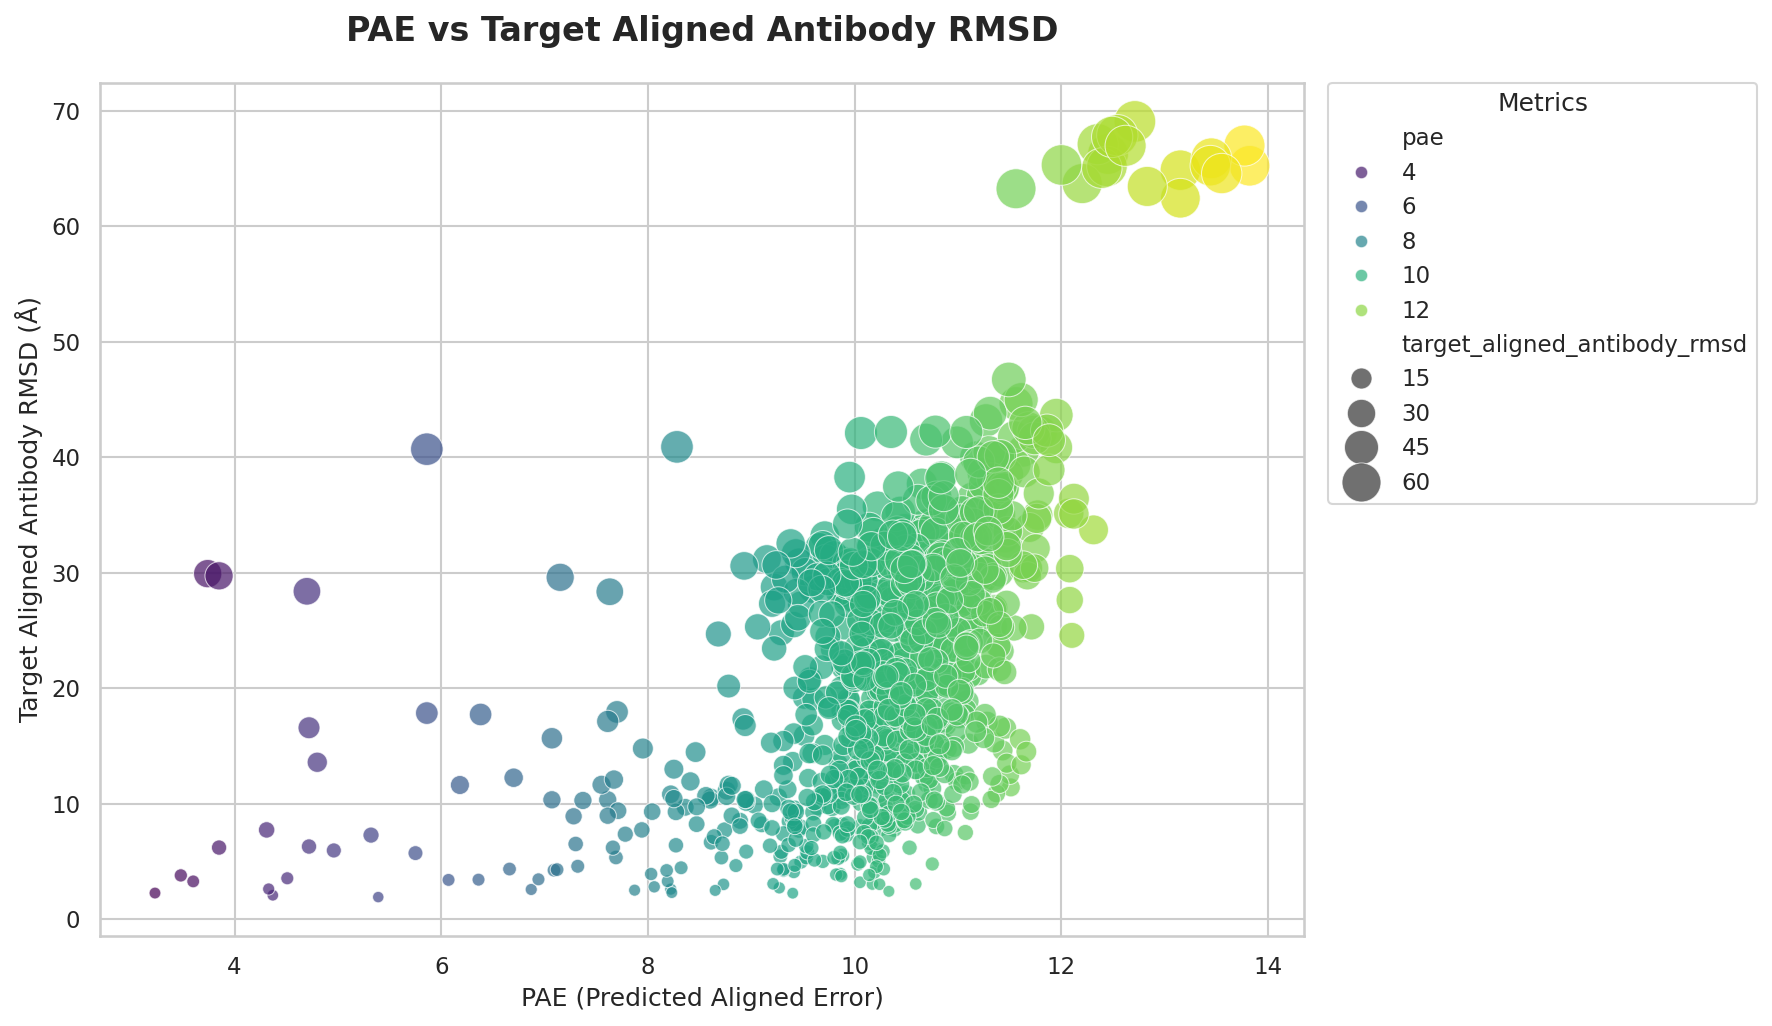

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Veriyi Yükleme
# Eğer dosya colab'de yüklü ise doğrudan yolu yazın.
input_file = '/content/3_rf2.sc'

try:
    df = pd.read_csv(input_file, sep=r'\s+')
except FileNotFoundError:
    # Dosya yoksa demo verisi oluşturulmaması için uyarı verelim
    print("Hata: Dosya bulunamadı. Lütfen '/content/3_rf2.sc' yolunu kontrol edin.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Grafik Stili Ayarları (Publication Quality)
    sns.set_theme(style="whitegrid") # Arka plan ızgaralı beyaz tema
    plt.figure(figsize=(12, 7), dpi=150) # Yüksek çözünürlük

    # 3. Scatter Plot (Bubble Chart) Oluşturma
    scatter = sns.scatterplot(
        data=df,
        x='pae',
        y='target_aligned_antibody_rmsd',
        hue='pae',                       # Renk PAE'ye göre değişsin
        palette='viridis',               # Referans görseldeki Mor->Sarı paleti
        size='target_aligned_antibody_rmsd', # Boyut RMSD'ye göre değişsin
        sizes=(30, 400),                 # Baloncukların minimum ve maksimum boyutu
        alpha=0.7,                       # Saydamlık (üst üste binenleri görmek için)
        edgecolor='white',               # Baloncuk kenarlarına beyaz çizgi (okunabilirlik)
        linewidth=0.5
    )

    # 4. Eksen ve Başlık Ayarları
    plt.title('PAE vs Target Aligned Antibody RMSD', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('PAE (Predicted Aligned Error)', fontsize=12)
    plt.ylabel('Target Aligned Antibody RMSD (Å)', fontsize=12)

    # 5. Lejant (Legend) Ayarı - Kutunun Dışına Alma
    # Referans görseldeki gibi lejantı sağ tarafa alıyoruz
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Metrics')

    # 6. Görseli Düzenle ve Göster
    plt.tight_layout()
    plt.show()

else:
    print("Veri seti boş olduğu için grafik çizilemedi.")

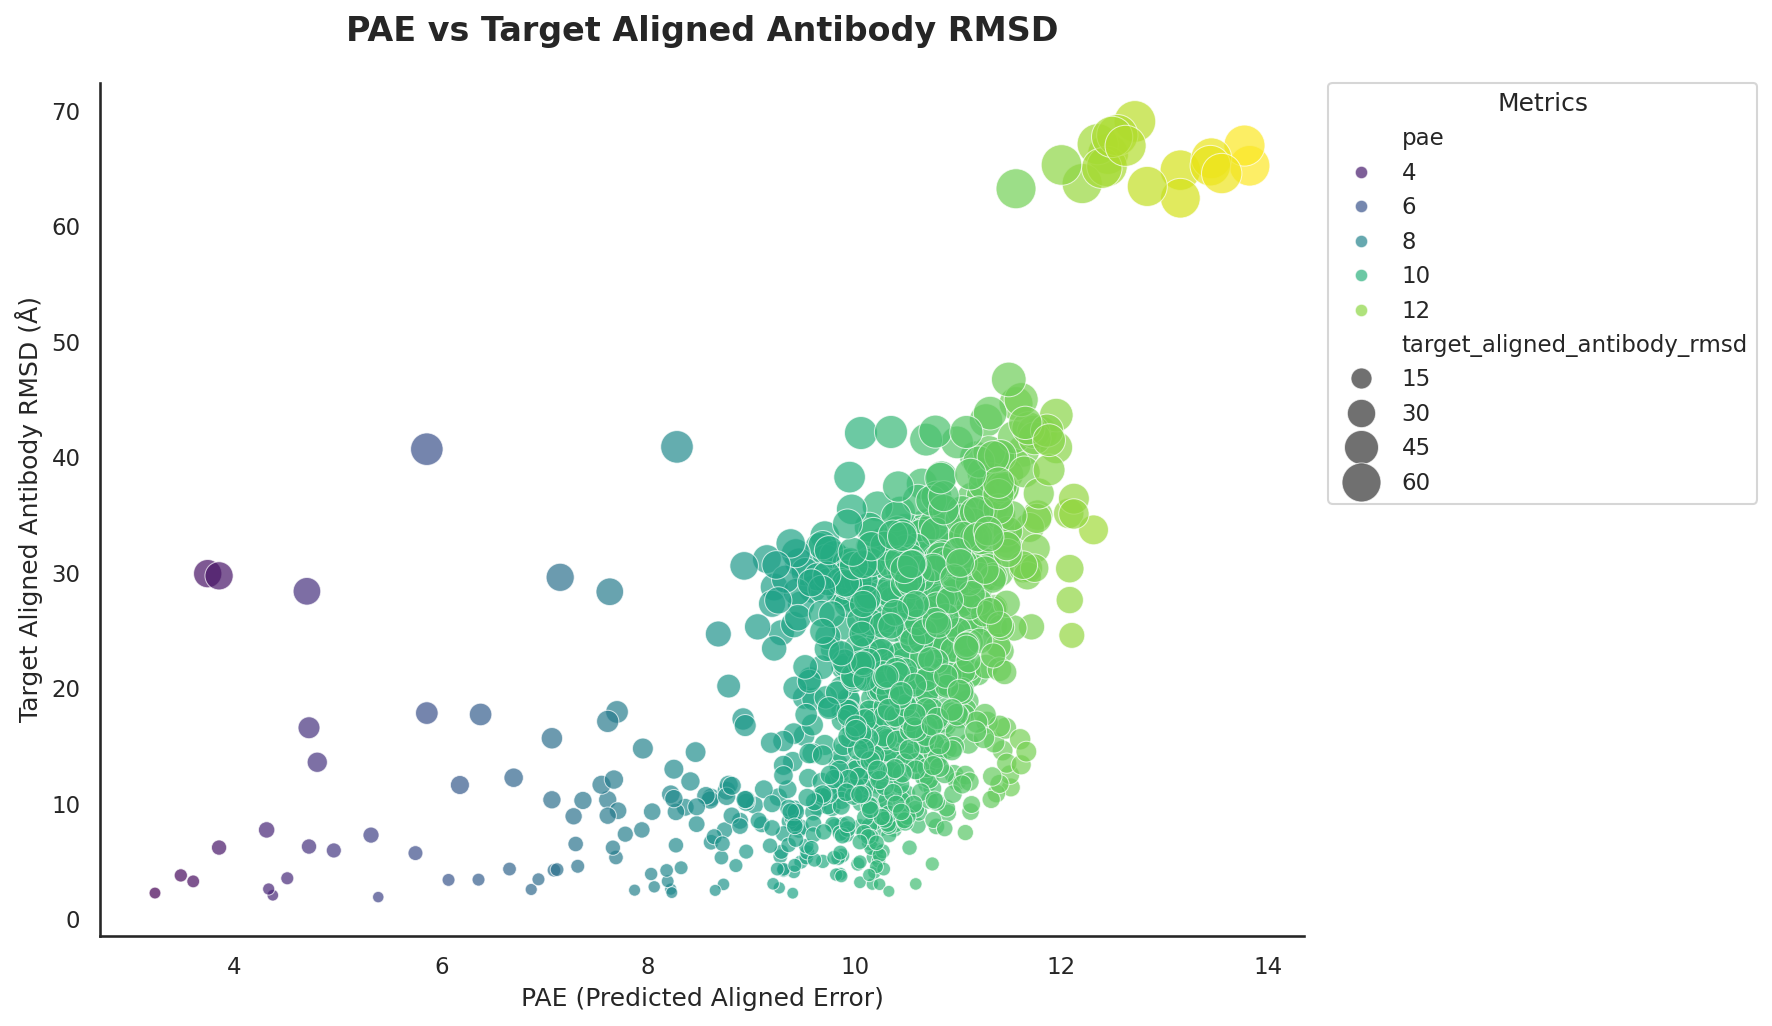

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Veriyi Yükleme
input_file = '/content/3_rf2.sc'

try:
    df = pd.read_csv(input_file, sep=r'\s+')
except FileNotFoundError:
    print("Hata: Dosya bulunamadı.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Grafik Stili Ayarları - GRID KAPALI
    # 'white' teması grid çizgilerini içermez, sade beyaz arka plan sağlar.
    sns.set_theme(style="white")

    plt.figure(figsize=(12, 7), dpi=150)

    # 3. Scatter Plot (Bubble Chart) Oluşturma
    scatter = sns.scatterplot(
        data=df,
        x='pae',
        y='target_aligned_antibody_rmsd',
        hue='pae',
        palette='viridis',
        size='target_aligned_antibody_rmsd',
        sizes=(30, 400),
        alpha=0.7,
        edgecolor='white',
        linewidth=0.5
    )

    # 4. Eksen ve Başlık Ayarları
    plt.title('PAE vs Target Aligned Antibody RMSD', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('PAE (Predicted Aligned Error)', fontsize=12)
    plt.ylabel('Target Aligned Antibody RMSD (Å)', fontsize=12)

    # Ekstra Güvenlik: Grid'i manuel olarak da kapatalım
    plt.grid(False)

    # Çerçeveyi daha zarif hale getirmek için 'despine' (üst ve sağ çizgileri kaldır)
    sns.despine()

    # 5. Lejant (Legend) Ayarı
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Metrics')

    # 6. Göster
    plt.tight_layout()
    plt.show()

else:
    print("Veri seti boş.")

In [32]:
import pandas as pd
import plotly.express as px

# 1. Veriyi Yükleme
input_file = '/content/3_rf2.sc'

try:
    df = pd.read_csv(input_file, sep=r'\s+')
except FileNotFoundError:
    print("Hata: Dosya bulunamadı.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Plotly ile İnteraktif Grafik Oluşturma
    fig = px.scatter(
        df,
        x='pae',
        y='target_aligned_antibody_rmsd',
        color='pae',  # Renk skalası PAE'ye göre
        size='target_aligned_antibody_rmsd', # Boyut RMSD'ye göre

        # --- İNTERAKTİVİTE ---
        # Üzerine gelince gözükecek ekstra veriler (Tag vb. buraya ekleyin)
        hover_data={
            'tag': True,
            'pae': ':.2f',
            'target_aligned_antibody_rmsd': ':.2f',
            'pred_lddt': True
        },

        title='Interactive PAE vs Target Aligned Antibody RMSD',
        color_continuous_scale='Viridis', # Sizin seçtiğiniz renk paleti
        template='plotly_white' # Sade beyaz tema
    )

    # 3. Görsel İnce Ayarlar (Sizin kodunuzdaki 'Grid Kapalı' stili için)
    fig.update_layout(
        xaxis_title="PAE (Predicted Aligned Error)",
        yaxis_title="Target Aligned Antibody RMSD (Å)",
        width=1100,
        height=700,
        font=dict(family="Arial", size=14),
    )

    # Grid çizgilerini kaldırma (Sizin isteğiniz)
    fig.update_xaxes(showgrid=False, showline=True, linecolor='black')
    fig.update_yaxes(showgrid=False, showline=True, linecolor='black')

    # 4. Göster
    fig.show()

else:
    print("Veri seti boş.")

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files  # Dosyayı indirmek için gerekli

# 1. Veriyi Yükleme
input_file = '/content/3_rf2.sc'

try:
    df = pd.read_csv(input_file, sep=r'\s+')
except FileNotFoundError:
    print("Hata: Dosya bulunamadı.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Filtreleme (Seçilenler ve Arka Plan)
    mask = (df['pae'] < 10) & (df['target_aligned_antibody_rmsd'] < 5)
    df_selected = df[mask].copy()
    df_background = df[~mask].copy()

    # 3. İNTERAKTİF GRAFİK OLUŞTURMA

    # Katman 1: Seçilen (Renkli) Tasarımlar
    # Plotly Express kullanarak ana yapıyı kuruyoruz
    fig = px.scatter(
        df_selected,
        x='pae',
        y='target_aligned_antibody_rmsd',
        color='pae',  # Renk PAE'ye göre
        size='target_aligned_antibody_rmsd', # Boyut RMSD'ye göre
        hover_name='tag', # Üzerine gelince tasarımın ismini göster
        hover_data={
            'pae': ':.2f',
            'target_aligned_antibody_rmsd': ':.2f',
            'pred_lddt': ':.2f'
        },
        color_continuous_scale='Viridis',
        title='Selected Designs (Interactive)',
        template='simple_white' # Sade beyaz tema (Grid yok)
    )

    # Katman 2: Arka Plan (Gri) Tasarımlar
    # Bunları manuel olarak arkaya ekliyoruz
    fig.add_trace(
        go.Scatter(
            x=df_background['pae'],
            y=df_background['target_aligned_antibody_rmsd'],
            mode='markers',
            name='Background',
            marker=dict(
                color='lightgrey',
                opacity=0.4,
                size=df_background['target_aligned_antibody_rmsd'] * 1.5, # Boyut ölçeklemesi
                line=dict(width=0.5, color='white')
            ),
            hoverinfo='skip' # Arka plan verisi için kutucuk çıkmasın
        )
    )

    # Arka plan noktalarını (Trace 1) en alta, renkli noktaları (Trace 0) üste al
    fig.data = fig.data[::-1]

    # 4. Görsel Ayarlar (İstediğiniz sadelik için)
    fig.update_layout(
        xaxis_title="PAE (Predicted Aligned Error)",
        yaxis_title="Target Aligned Antibody RMSD (Å)",
        width=1100,
        height=700,
        font=dict(family="Arial", size=14),
        showlegend=False # Arka plan için lejantı gizle
    )

    # 5. HTML OLARAK KAYDET VE İNDİR
    output_filename = 'interactive_antibody_design_plot.html'
    fig.write_html(output_filename)

    print(f"Grafik '{output_filename}' olarak oluşturuldu. İndirme başlıyor...")
    files.download(output_filename)

else:
    print("Veri seti boş.")

Grafik 'interactive_antibody_design_plot.html' olarak oluşturuldu. İndirme başlıyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
import pandas as pd
import plotly.graph_objects as go
from google.colab import files

# 1. Veriyi Yükleme
input_file = '/content/3_rf2.sc'

try:
    df = pd.read_csv(input_file, sep=r'\s+')
except FileNotFoundError:
    print("Hata: Dosya bulunamadı.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Filtreleme
    mask = (df['pae'] < 10) & (df['target_aligned_antibody_rmsd'] < 5)
    df_selected = df[mask].copy()
    df_background = df[~mask].copy()

    # 3. Grafik Oluşturma (Plotly Graph Objects)
    fig = go.Figure()

    # --- Katman 1: Seçilmemiş (Gri) - Başlangıçta Görünür ---
    fig.add_trace(go.Scatter(
        x=df_background['pae'],
        y=df_background['target_aligned_antibody_rmsd'],
        mode='markers',
        name='Unselected (Grey)',
        marker=dict(
            color='lightgrey',
            size=df_background['target_aligned_antibody_rmsd'],
            sizemode='area',
            sizeref=2. * max(df['target_aligned_antibody_rmsd']) / (40.**2), # Boyut ölçeği
            sizemin=4,
            opacity=0.5,
            line=dict(width=0.5, color='white')
        ),
        text=df_background['tag'], # İsimler
        hovertemplate='<b>%{text}</b><br>PAE: %{x:.2f}<br>RMSD: %{y:.2f}<extra></extra>'
    ))

    # --- Katman 2: Seçilmiş (Renkli) ---
    fig.add_trace(go.Scatter(
        x=df_selected['pae'],
        y=df_selected['target_aligned_antibody_rmsd'],
        mode='markers',
        name='Selected (Colored)',
        marker=dict(
            color=df_selected['pae'],
            colorscale='Viridis',
            cmin=4, cmax=12, # Renk skalasını sabitleme
            size=df_selected['target_aligned_antibody_rmsd'],
            sizemode='area',
            sizeref=2. * max(df['target_aligned_antibody_rmsd']) / (40.**2),
            sizemin=4,
            opacity=0.9,
            line=dict(width=1, color='black'),
            colorbar=dict(title='PAE')
        ),
        text=df_selected['tag'],
        hovertemplate='<b>%{text}</b><br>PAE: %{marker.color:.2f}<br>RMSD: %{y:.2f}<extra></extra>'
    ))

    # 4. BUTON EKLEME (Tıklama Eklentisi)
    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(
                        args=[{"visible": [True, True]}],  # [Trace 0 (Gri), Trace 1 (Renkli)] -> İkisi de açık
                        label="Show Grey Background",
                        method="update"
                    ),
                    dict(
                        args=[{"visible": [False, True]}], # [Trace 0 (Gri) KAPALI, Trace 1 (Renkli) AÇIK]
                        label="Hide Background",
                        method="update"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.0,
                xanchor="left",
                y=1.15,
                yanchor="top"
            ),
        ]
    )

    # 5. Genel Ayarlar
    fig.update_layout(
        title='Interactive PAE vs RMSD (with Toggle Button)',
        xaxis_title="PAE (Predicted Aligned Error)",
        yaxis_title="Target Aligned Antibody RMSD (Å)",
        width=1100,
        height=700,
        font=dict(family="Arial", size=14),
        plot_bgcolor='white',
        xaxis=dict(showgrid=False, showline=True, linecolor='black'),
        yaxis=dict(showgrid=False, showline=True, linecolor='black'),
        legend=dict(x=1.02, y=1)
    )

    # HTML olarak kaydet ve indir
    output_filename = 'interactive_plot_toggle.html'
    fig.write_html(output_filename)
    print(f"Grafik '{output_filename}' olarak hazırlandı. İndiriliyor...")
    files.download(output_filename)

else:
    print("Veri seti boş.")

Grafik 'interactive_plot_toggle.html' olarak hazırlandı. İndiriliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
import pandas as pd
import plotly.graph_objects as go
from google.colab import files

# 1. Veriyi Yükleme
input_file = '/content/3_rf2.sc'

try:
    df = pd.read_csv(input_file, sep=r'\s+')
except FileNotFoundError:
    print("Hata: Dosya bulunamadı.")
    df = pd.DataFrame()

if not df.empty:
    # 2. Filtreleme
    mask = (df['pae'] < 10) & (df['target_aligned_antibody_rmsd'] < 5)
    df_selected = df[mask].copy()
    df_background = df[~mask].copy()

    # 3. Grafik Oluşturma (Plotly Graph Objects)
    fig = go.Figure()

    # --- Katman 1: Seçilmemiş (Gri) - Başlangıçta Görünür ---
    fig.add_trace(go.Scatter(
        x=df_background['pae'],
        y=df_background['target_aligned_antibody_rmsd'],
        mode='markers',
        name='Unselected (n = 961)',
        marker=dict(
            color='lightgrey',
            size=df_background['target_aligned_antibody_rmsd'],
            sizemode='area',
            sizeref=2. * max(df['target_aligned_antibody_rmsd']) / (40.**2),
            sizemin=4,
            opacity=0.5,
            line=dict(width=0.5, color='white')
        ),
        text=df_background['tag'],
        hovertemplate='<b>%{text}</b><br>PAE: %{x:.2f}<br>RMSD: %{y:.2f}<extra></extra>'
    ))

    # --- Katman 2: Seçilmiş (Renkli) ---
    # RENK BARI KALDIRILDI
    fig.add_trace(go.Scatter(
        x=df_selected['pae'],
        y=df_selected['target_aligned_antibody_rmsd'],
        mode='markers',
        name='Selected (n = 39)',
        marker=dict(
            color=df_selected['pae'],
            colorscale='Viridis',
            cmin=4, cmax=12,
            size=df_selected['target_aligned_antibody_rmsd'],
            sizemode='area',
            sizeref=2. * max(df['target_aligned_antibody_rmsd']) / (40.**2),
            sizemin=4,
            opacity=0.9,
            line=dict(width=1, color='black')
            # colorbar=dict(title='PAE') satırı SİLİNDİ
        ),
        text=df_selected['tag'],
        hovertemplate='<b>%{text}</b><br>PAE: %{marker.color:.2f}<br>RMSD: %{y:.2f}<extra></extra>'
    ))

    # 4. BUTON EKLEME ve YERLEŞİMİ (DÜZELTİLDİ)
    fig.update_layout(
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=list([
                    dict(
                        args=[{"visible": [True, True]}],
                        label="All Designs",
                        method="update"
                    ),
                    dict(
                        args=[{"visible": [False, True]}],
                        label="Selected Designs",
                        method="update"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                # Yeni Pozisyonlar: Grafiğin sol üst köşesi, çerçevenin hemen üstü
                x=0.01,
                xanchor="left",
                y=1.02,
                yanchor="bottom"
            ),
        ]
    )

    # 5. Genel Ayarlar
    fig.update_layout(
        title={
            'text': 'PAE and Target Aligned Antibody RMSD',
            'y':0.98, # Başlığı biraz aşağı al
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title="PAE (Predicted Aligned Error)",
        yaxis_title="Target Aligned Antibody RMSD (Å)",
        width=1100,
        height=700,
        font=dict(family="Arial", size=14),
        plot_bgcolor='white',
        xaxis=dict(showgrid=False, showline=True, linecolor='black'),
        yaxis=dict(showgrid=False, showline=True, linecolor='black'),
        legend=dict(x=1.02, y=1),
        # Butonlar için üstte biraz daha boşluk bırak
        margin=dict(t=100)
    )

    # HTML olarak kaydet ve indir
    output_filename = 'interactive_plot_final_no_colorbar.html'
    fig.write_html(output_filename)
    print(f"Grafik '{output_filename}' olarak hazırlandı. İndiriliyor...")
    files.download(output_filename)

else:
    print("Veri seti boş.")

Grafik 'interactive_plot_final_no_colorbar.html' olarak hazırlandı. İndiriliyor...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

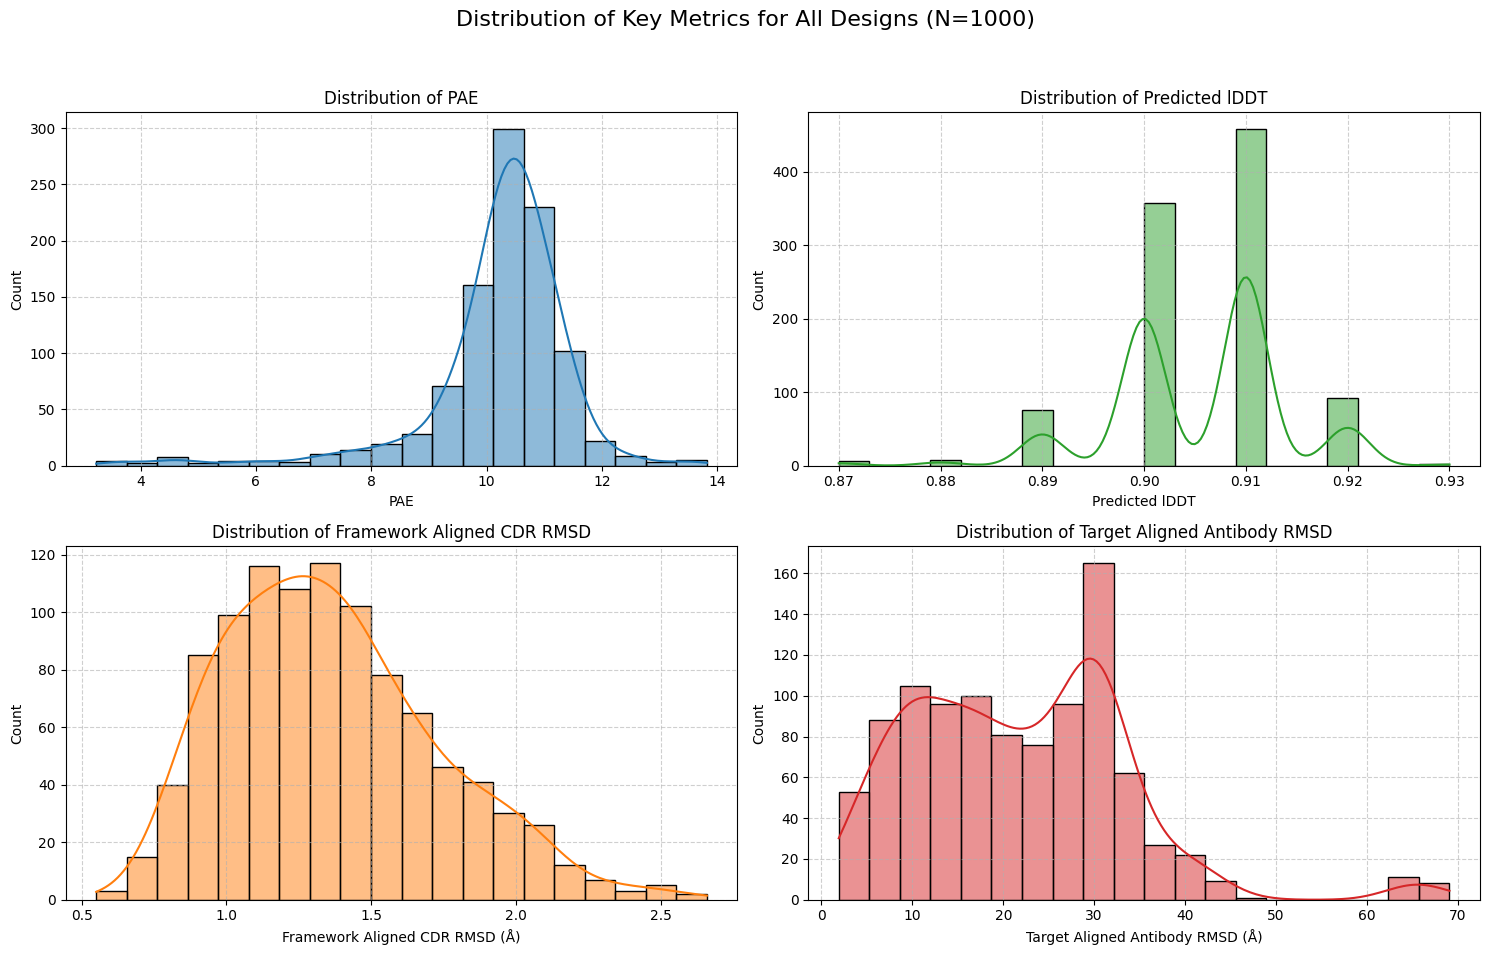

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_all is available. If this cell is run independently, reload the original data.
if 'df_all' not in locals():
    print("Loading data for df_all...")
    original_file = '/content/3_rf2.sc'
    df_all = pd.read_csv(original_file, sep=r'\s+')

if not df_all.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Distribution of Key Metrics for All Designs (N=1000)', fontsize=16) # Updated title

    # Using a predefined Seaborn color palette for distinct plots
    colors = sns.color_palette('tab10', n_colors=4)

    # Histogram for PAE
    sns.histplot(df_all['pae'], bins=20, kde=True, ax=axes[0, 0], color=colors[0]) # Using df_all with first color
    axes[0, 0].set_title('Distribution of PAE')
    axes[0, 0].set_xlabel('PAE')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].grid(True, linestyle='--', alpha=0.6)

    # Histogram for pred_lddt
    sns.histplot(df_all['pred_lddt'], bins=20, kde=True, ax=axes[0, 1], color=colors[2]) # Changed color for pred_lddt to a green shade (colors[2])
    axes[0, 1].set_title('Distribution of Predicted lDDT')
    axes[0, 1].set_xlabel('Predicted lDDT')
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].grid(True, linestyle='--', alpha=0.6)

    # Histogram for framework_aligned_cdr_rmsd
    sns.histplot(df_all['framework_aligned_cdr_rmsd'], bins=20, kde=True, ax=axes[1, 0], color=colors[1]) # Using df_all with second color (now lightcoral)
    axes[1, 0].set_title('Distribution of Framework Aligned CDR RMSD')
    axes[1, 0].set_xlabel('Framework Aligned CDR RMSD (Å)')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].grid(True, linestyle='--', alpha=0.6)

    # Histogram for target_aligned_antibody_rmsd
    sns.histplot(df_all['target_aligned_antibody_rmsd'], bins=20, kde=True, ax=axes[1, 1], color=colors[3]) # Using df_all with fourth color
    axes[1, 1].set_title('Distribution of Target Aligned Antibody RMSD')
    axes[1, 1].set_xlabel('Target Aligned Antibody RMSD (Å)')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()
else:
    print("No data found to visualize.")

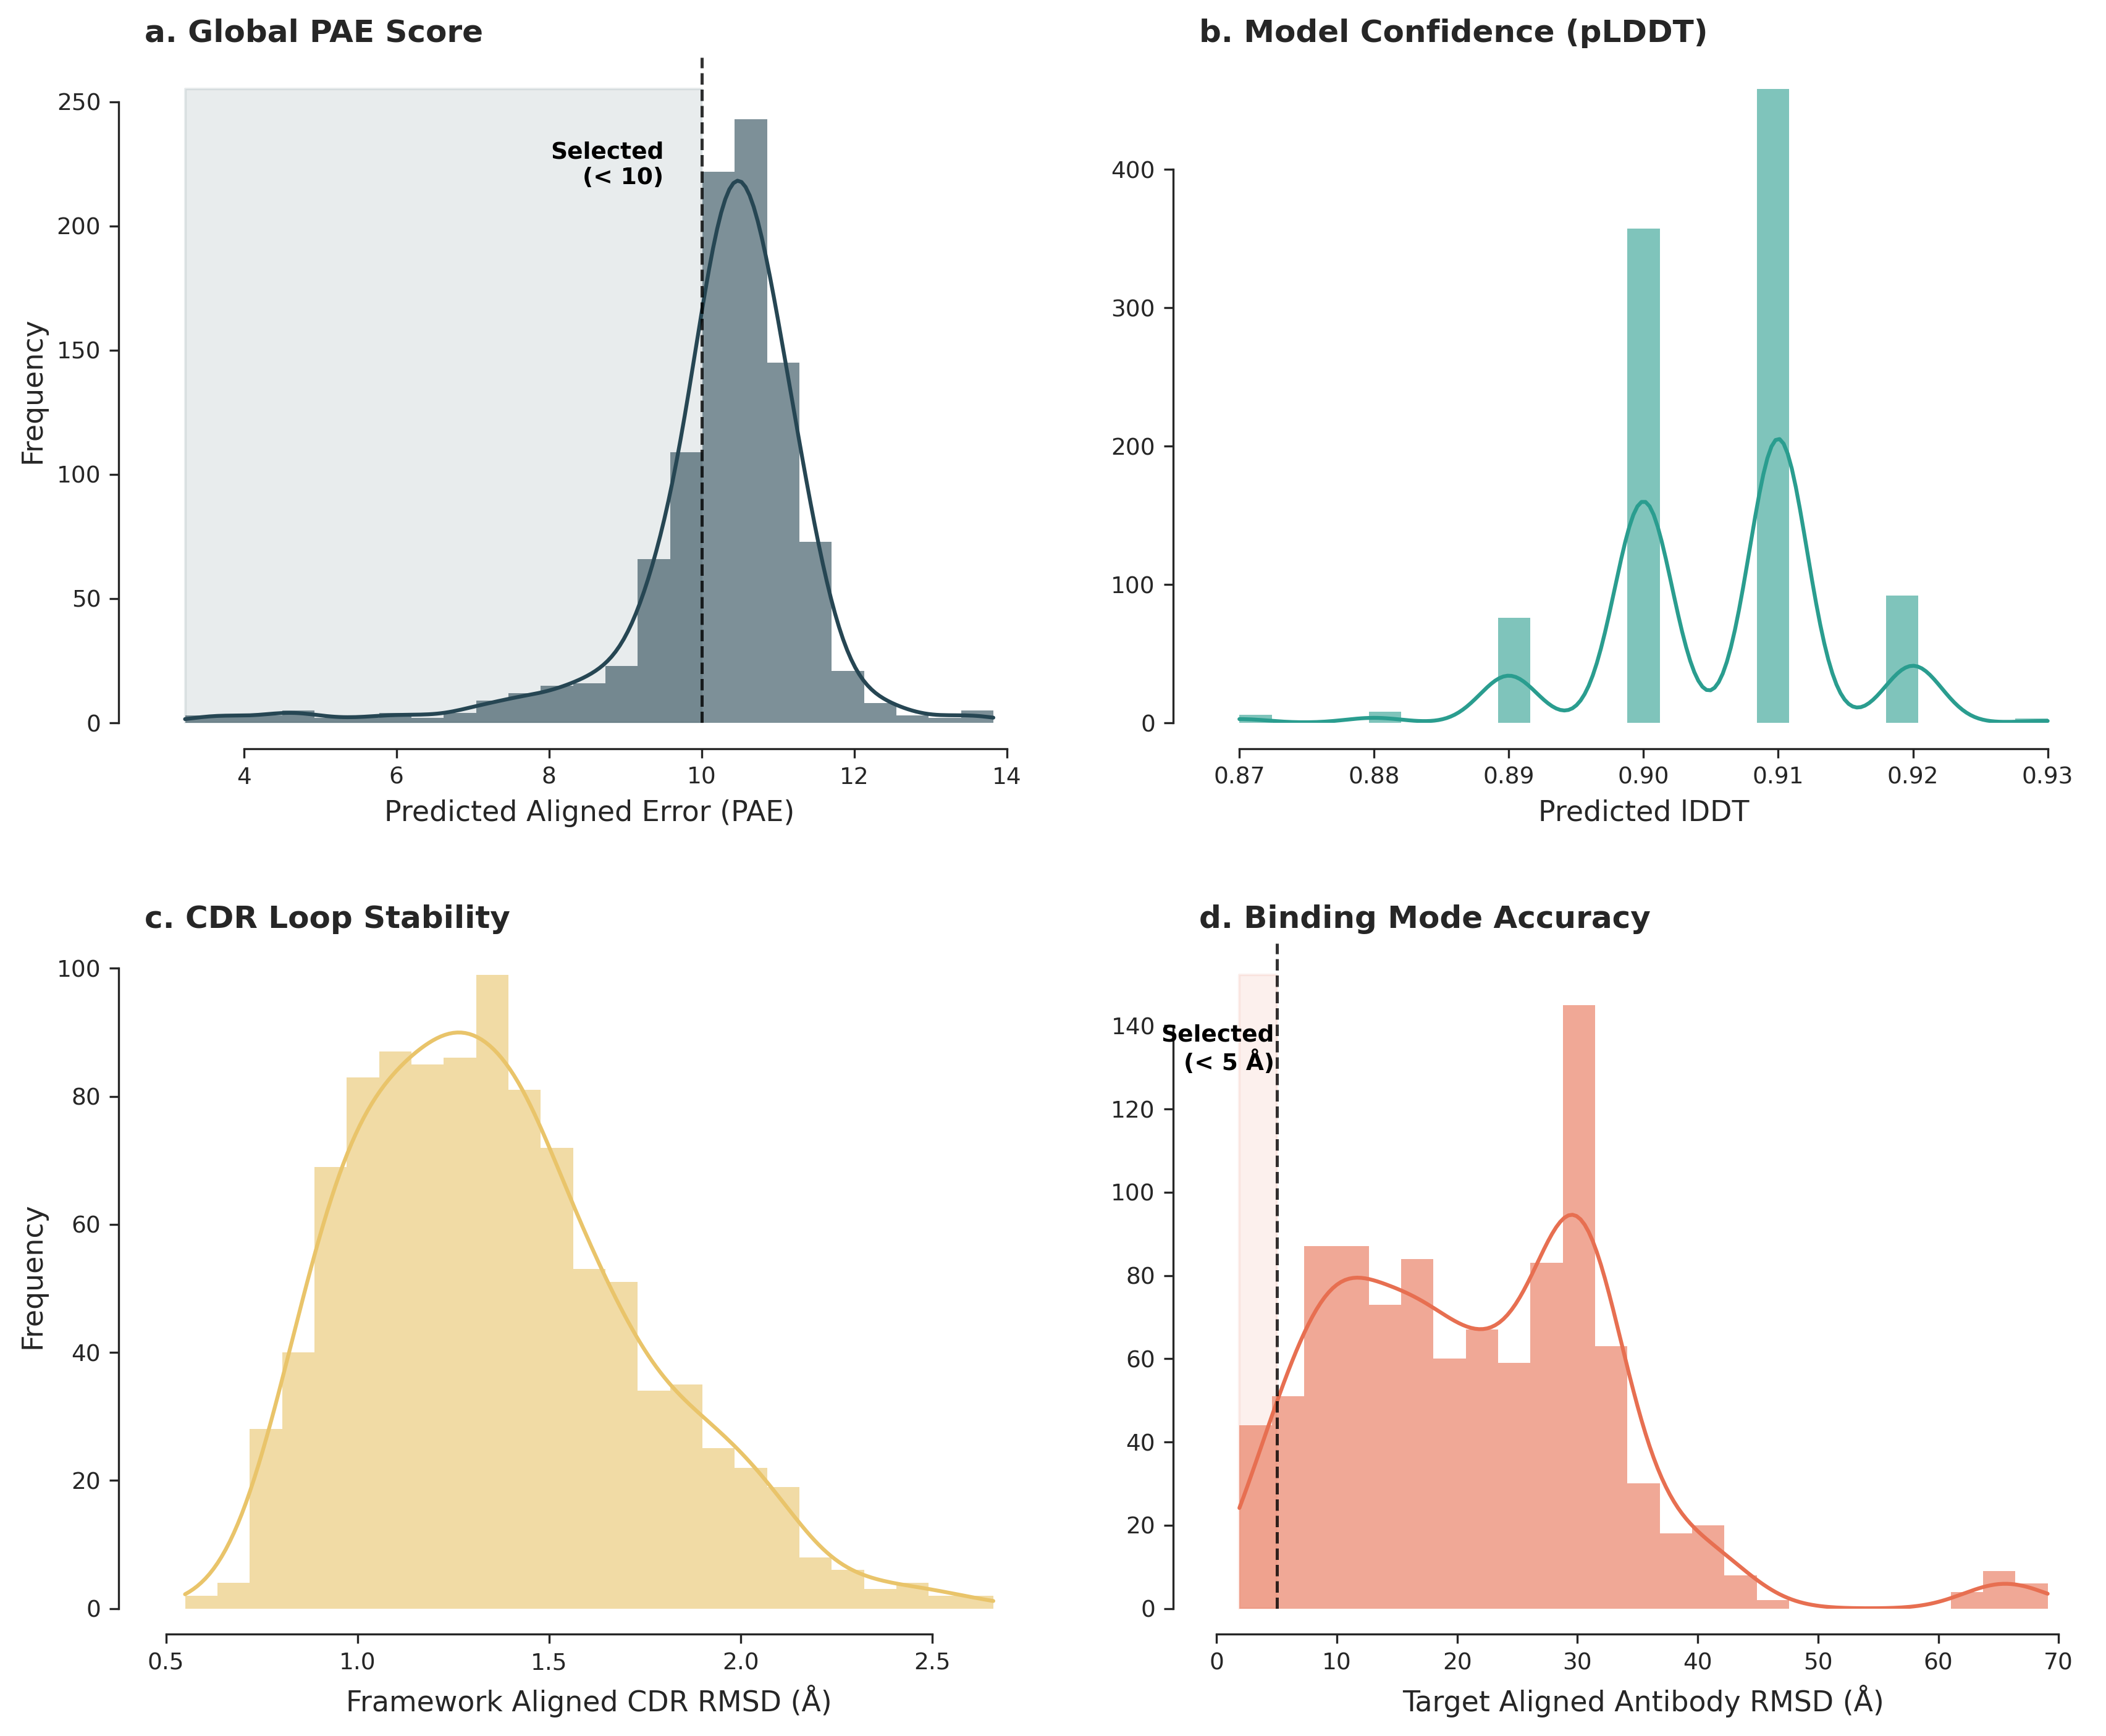

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

# --- 1. STİL AYARLARI (Nature/Science Standardı) ---
# Arial veya Helvetica fontu akademik standarttır.
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 14

# "Ticks" stili, gridleri kaldırıp eksen çizgilerini dışa verir (daha temiz görünüm)
sns.set_style("ticks")

# Veri Kontrolü
if 'df_all' not in locals():
    # Demo amaçlı yükleme (Sizde zaten yüklü ise burayı atlar)
    input_file = '/content/3_rf2.sc'
    try:
        df_all = pd.read_csv(input_file, sep=r'\s+')
    except:
        print("Veri yüklenemedi, lütfen df_all değişkenini kontrol edin.")
        df_all = pd.DataFrame()

if not df_all.empty:
    # Profesyonel, göz yormayan, renk körü dostu palet
    # (Teal, SteelBlue, Muted Purple, Muted Red)
    custom_colors = ["#264653", "#2A9D8F", "#E9C46A", "#E76F51"]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=300) # 300 DPI baskı kalitesidir

    # Başlık opsiyoneldir, paper'larda genelde Figure Caption'da yazar ama buraya ekleyelim
    # fig.suptitle('Structural Metrics Distribution', fontweight='bold', y=0.98)

    # --- PLOT 1: PAE (Cutoff < 10) ---
    ax1 = axes[0, 0]
    sns.histplot(df_all['pae'], bins=25, kde=True, ax=ax1,
                 color=custom_colors[0], alpha=0.6, element="step", linewidth=0)

    # Cutoff Çizgisi ve Alan Boyama
    cutoff_pae = 10
    ax1.axvline(x=cutoff_pae, color='black', linestyle='--', linewidth=1.2, alpha=0.8)

    # Seçilen alanı hafifçe boya (Elegant vurgu)
    # y ekseni limitlerini alıp boyama yapalım
    ymin, ymax = ax1.get_ylim()
    ax1.fill_betweenx([ymin, ymax], df_all['pae'].min(), cutoff_pae, color=custom_colors[0], alpha=0.1)

    # Metin (Annotation) - Lejant yerine doğrudan grafik üzerine
    ax1.text(cutoff_pae - 0.5, ymax*0.85, 'Selected\n(< 10)',
             horizontalalignment='right', color='black', fontsize=9, fontweight='bold')

    ax1.set_xlabel('Predicted Aligned Error (PAE)')
    ax1.set_ylabel('Frequency')
    ax1.set_title('a. Global PAE Score', loc='left', fontweight='bold')

    # --- PLOT 2: Predicted lDDT ---
    ax2 = axes[0, 1]
    sns.histplot(df_all['pred_lddt'], bins=25, kde=True, ax=ax2,
                 color=custom_colors[1], alpha=0.6, element="step", linewidth=0)
    ax2.set_xlabel('Predicted lDDT')
    ax2.set_ylabel('') # Y ekseni tekrarına gerek yok, clean look
    ax2.set_title('b. Model Confidence (pLDDT)', loc='left', fontweight='bold')

    # --- PLOT 3: Framework Aligned CDR RMSD ---
    ax3 = axes[1, 0]
    sns.histplot(df_all['framework_aligned_cdr_rmsd'], bins=25, kde=True, ax=ax3,
                 color=custom_colors[2], alpha=0.6, element="step", linewidth=0)
    ax3.set_xlabel('Framework Aligned CDR RMSD (Å)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('c. CDR Loop Stability', loc='left', fontweight='bold')

    # --- PLOT 4: Target Aligned Antibody RMSD (Cutoff < 5) ---
    ax4 = axes[1, 1]
    sns.histplot(df_all['target_aligned_antibody_rmsd'], bins=25, kde=True, ax=ax4,
                 color=custom_colors[3], alpha=0.6, element="step", linewidth=0)

    # Cutoff Çizgisi ve Alan Boyama
    cutoff_rmsd = 5
    ax4.axvline(x=cutoff_rmsd, color='black', linestyle='--', linewidth=1.2, alpha=0.8)

    ymin, ymax = ax4.get_ylim()
    ax4.fill_betweenx([ymin, ymax], df_all['target_aligned_antibody_rmsd'].min(), cutoff_rmsd, color=custom_colors[3], alpha=0.1)

    ax4.text(cutoff_rmsd - 0.2, ymax*0.85, 'Selected\n(< 5 Å)',
             horizontalalignment='right', color='black', fontsize=9, fontweight='bold')

    ax4.set_xlabel('Target Aligned Antibody RMSD (Å)')
    ax4.set_ylabel('')
    ax4.set_title('d. Binding Mode Accuracy', loc='left', fontweight='bold')

    # --- GENEL TEMİZLİK (THE MAGIC TOUCH) ---
    # Despine: Üst ve sağ çerçeveleri kaldırır (Nature stili)
    sns.despine(trim=True, offset=10)

    plt.tight_layout(pad=3.0)
    plt.show()

else:
    print("Görselleştirilecek veri yok.")

In [44]:
import pandas as pd

# Dosya yolları
input_file = '/content/3_rf2.sc'
output_file = '/content/top_100_filtered_sorted.csv' # Çıktı ismini güncelledim

# Dosyayı yükle
df = pd.read_csv(input_file, sep=r'\s+')

# 1. Filtreleri Uygula
# pae < 10 VE target_aligned_antibody_rmsd < 8.0
filtered_df = df[
    (df['pae'] < 10) &
    (df['target_aligned_antibody_rmsd'] < 5)
].copy()

# 2. Değerlere Göre Sırala
# Öncelik PAE, sonra RMSD. (Küçükten büyüğe)
sorted_df = filtered_df.sort_values(
    by=['pae', 'target_aligned_antibody_rmsd'],
    ascending=[True, True]
)

# 3. İLK 100 TANESİNİ SEÇ
# Eğer filtre sonrası 100'den az veri kaldıysa hepsini, çoksa ilk 100'ü alır.
top_100_df = sorted_df.head(100)

# Sonuçları Göster
print(f"Filtreden Geçen Toplam Sayı: {len(sorted_df)}")
print(f"Seçilen (İlk 100) Sayısı: {len(top_100_df)}")
print("-" * 50)
print(top_100_df[['tag', 'pae', 'target_aligned_antibody_rmsd']])

# CSV olarak kaydet
top_100_df.to_csv(output_file, index=False)
print(f"Dosya kaydedildi: {output_file}")

Filtreden Geçen Toplam Sayı: 39
Seçilen (İlk 100) Sayısı: 39
--------------------------------------------------
                                   tag   pae  target_aligned_antibody_rmsd
776  samples_design_77_dldesign_6_best  3.23                          2.25
832  samples_design_83_dldesign_2_best  3.48                          3.78
771  samples_design_77_dldesign_1_best  3.60                          3.26
831  samples_design_83_dldesign_1_best  4.33                          2.60
254  samples_design_25_dldesign_4_best  4.37                          2.06
735  samples_design_73_dldesign_5_best  4.51                          3.53
252  samples_design_25_dldesign_2_best  5.39                          1.90
730  samples_design_73_dldesign_0_best  6.07                          3.39
739  samples_design_73_dldesign_9_best  6.36                          3.41
860  samples_design_86_dldesign_0_best  6.66                          4.33
482  samples_design_48_dldesign_2_best  6.87                   

In [9]:
import pandas as pd

# Dosya yolları
input_file = '/content/3_rf2.sc'
output_file = '/content/top_100_high_quality.csv'

# Dosyayı yükle
df = pd.read_csv(input_file, sep=r'\s+')

# BAŞARILI TAHMİN İÇİN KRİTİK FİLTRELER
filtered_df = df[
    # En kritik: H3 loop doğruluğu (antijen tanıma için hayati)
    (df['framework_aligned_H3_rmsd'] < 3.0) &

    # Tüm CDR bölgelerinin kalitesi
    (df['framework_aligned_cdr_rmsd'] < 3.0) &

    # Genel antikor yapı doğruluğu
    (df['target_aligned_antibody_rmsd'] < 5.0) &

    # Model güvenilirliği (yüksek kalite için)
    (df['pred_lddt'] > 0.75) &

    # Bölgeler arası mesafe hatası
    (df['pae'] < 10.0) &

    # Diğer CDR loop'ları (kanonik loop'lar için daha sıkı)
    (df['framework_aligned_H1_rmsd'] < 2.5) &
    (df['framework_aligned_H2_rmsd'] < 2.5) &
    (df['framework_aligned_L1_rmsd'] < 2.5) &
    (df['framework_aligned_L2_rmsd'] < 2.5) &
    (df['framework_aligned_L3_rmsd'] < 3.0)
].copy()

# SIRALAMA: Önce en kritik metriklere göre
sorted_df = filtered_df.sort_values(
    by=[
        'framework_aligned_H3_rmsd',      # 1. En kritik: H3 doğruluğu
        'framework_aligned_cdr_rmsd',     # 2. Tüm CDR kalitesi
        'pae',                             # 3. Genel güvenilirlik
        'pred_lddt'                            # 4. Model skoru (yüksekten düşüğe)
    ],
    ascending=[True, True, True, False]   # plddt için False (yüksek değer istiyoruz)
)

# İlk 100 en iyi yapıyı seç
top_100_df = sorted_df.head(100)

# Detaylı İstatistikler
print("="*70)
print("BAŞARILI TAHMİN FİLTRELEMESİ SONUÇLARI")
print("="*70)
print(f"\nToplam Yapı Sayısı: {len(df)}")
print(f"Filtreleri Geçen Yapı Sayısı: {len(sorted_df)}")
print(f"Seçilen En İyi Yapı Sayısı: {len(top_100_df)}")
print(f"Başarı Oranı: {len(sorted_df)/len(df)*100:.2f}%")

if len(top_100_df) > 0:
    print("\n" + "="*70)
    print("SEÇİLEN YAPILARIN KALİTE METRİKLERİ (ORTALAMA)")
    print("="*70)
    print(f"H3 RMSD Ortalama: {top_100_df['framework_aligned_H3_rmsd'].mean():.2f} Å")
    print(f"Tüm CDR RMSD Ortalama: {top_100_df['framework_aligned_cdr_rmsd'].mean():.2f} Å")
    print(f"Antikor RMSD Ortalama: {top_100_df['target_aligned_antibody_rmsd'].mean():.2f} Å")
    print(f"pLDDT Ortalama: {top_100_df['pred_lddt'].mean():.2f}")
    print(f"pAE Ortalama: {top_100_df['pae'].mean():.2f} Å")

    print("\n" + "="*70)
    print("EN İYİ 10 YAPI")
    print("="*70)
    print(top_100_df[['tag', 'framework_aligned_H3_rmsd', 'framework_aligned_cdr_rmsd',
                       'pred_lddt', 'pae', 'target_aligned_antibody_rmsd']].head(10).to_string(index=False))

    # CSV olarak kaydet
    top_100_df.to_csv(output_file, index=False)
    print(f"\n✓ Dosya kaydedildi: {output_file}")
else:
    print("\n⚠ UYARI: Filtreleri geçen yapı bulunamadı!")
    print("Filtreleri gevşetmeyi düşünebilirsiniz.")

    # Hangi filtrelerin en çok elediğini göster
    print("\nFİLTRE ANALİZİ:")
    print(f"H3 RMSD < 3.0: {len(df[df['framework_aligned_H3_rmsd'] < 3.0])} yapı")
    print(f"CDR RMSD < 3.0: {len(df[df['framework_aligned_cdr_rmsd'] < 3.0])} yapı")
    print(f"Antikor RMSD < 5.0: {len(df[df['target_aligned_antibody_rmsd'] < 5.0])} yapı")
    print(f"pred_LDDT > 0.75: {len(df[df['pred_lddt'] > 0.75])} yapı")
    print(f"pAE < 5.0: {len(df[df['pae'] < 5.0])} yapı")

BAŞARILI TAHMİN FİLTRELEMESİ SONUÇLARI

Toplam Yapı Sayısı: 1000
Filtreleri Geçen Yapı Sayısı: 35
Seçilen En İyi Yapı Sayısı: 35
Başarı Oranı: 3.50%

SEÇİLEN YAPILARIN KALİTE METRİKLERİ (ORTALAMA)
H3 RMSD Ortalama: 1.34 Å
Tüm CDR RMSD Ortalama: 1.23 Å
Antikor RMSD Ortalama: 3.48 Å
pLDDT Ortalama: 0.90
pAE Ortalama: 7.48 Å

EN İYİ 10 YAPI
                              tag  framework_aligned_H3_rmsd  framework_aligned_cdr_rmsd  pred_lddt  pae  target_aligned_antibody_rmsd
samples_design_73_dldesign_5_best                       0.53                        0.73       0.90 4.51                          3.53
samples_design_86_dldesign_1_best                       0.53                        1.31       0.90 8.03                          3.90
samples_design_73_dldesign_2_best                       0.58                        0.78       0.90 6.94                          3.44
samples_design_39_dldesign_5_best                       0.63                        1.29       0.91 8.65                